# P~S 데이터 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

공복 혈당치 126 mg/dL 이상

## 2017, 2018년 데이터 각각 가져오기

In [3]:
data1 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='euc-kr')
data2 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')

In [4]:
data1.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [5]:
data1.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [6]:
data2.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,...,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,...,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,...,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,...,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


In [7]:
len(data1)

1000000

In [8]:
len(data2)

1000000

In [9]:
data1 = data1[['식전혈당(공복혈당)','총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤']]
data2 = data2[['식전혈당(공복혈당)','총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤']]

In [10]:
data1.head()

,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤
0,99.0,193.0,92.0,48.0,126.0
1,106.0,228.0,121.0,55.0,148.0
2,98.0,136.0,104.0,41.0,74.0
3,95.0,201.0,106.0,76.0,104.0
4,101.0,199.0,104.0,61.0,117.0


In [11]:
data2.head()

,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤
0,96.0,NaN,NaN,NaN,NaN
1,79.0,NaN,NaN,NaN,NaN
2,80.0,NaN,NaN,NaN,NaN
3,100.0,234.0,90.0,80.0,135.0
4,124.0,NaN,NaN,NaN,NaN


## Null값 개수 확인

In [12]:
data1.isnull().sum()

식전혈당(공복혈당)      42
총콜레스테롤          43
트리글리세라이드        45
HDL콜레스테롤        44
LDL콜레스테롤      2912
dtype: int64

In [13]:
data2.isnull().sum()

식전혈당(공복혈당)      5915
총콜레스테롤        667244
트리글리세라이드      667252
HDL콜레스테롤      667254
LDL콜레스테롤      674122
dtype: int64

2017년 데이터는 null값인 데이터가 비교적 적은 것에 비해 2018년 데이터는 절반 이상의 데이터가 null값으로 들어가 있는 것을 확인할 수 있다...   

**이 데이터를 어떻게 처리해야 할까?**

## 각각 항목의 최대, 최소, 평균값

### 총콜레스테롤

In [14]:
print("총콜레스테롤 max :",data1['총콜레스테롤'].max())
print("총콜레스테롤 min :",data1['총콜레스테롤'].min())
print("총콜레스테롤 avg :",data1['총콜레스테롤'].mean())

총콜레스테롤 max : 2344.0
총콜레스테롤 min : 30.0
총콜레스테롤 avg : 195.54825057477473


총콜레스테롤 수치가 2344인 것이 이상하다... 저렇게 높으면 사람 죽지않나?   

찾아보니 콜레스테롤의 정상 범위는 200 미만, 높은게 240이상이다.   
따라서 2344 라는 수치는 뭔가 잘못된 것이 분명하다. 이런 수치는 어떻게 처리하지?

In [15]:
print("총콜레스테롤 max :",data2['총콜레스테롤'].max())
print("총콜레스테롤 min :",data2['총콜레스테롤'].min())
print("총콜레스테롤 avg :",data2['총콜레스테롤'].mean())

총콜레스테롤 max : 2386.0
총콜레스테롤 min : 6.0
총콜레스테롤 avg : 195.91105194196348


2018년 데이터 또한 최대 콜레스테롤 수치가 비정상적으로 높게 나왔다.

In [16]:
data1[data1["총콜레스테롤"] > 400]

,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤
7150,83.0,1619.0,9490.0,8110.0,5119.0
7869,339.0,600.0,4000.0,40.0,31.0
18829,149.0,426.0,1285.0,46.0,149.0
31184,93.0,404.0,288.0,55.0,291.0
33543,88.0,405.0,165.0,50.0,322.0
...,...,...,...,...,...
993512,172.0,432.0,1348.0,43.0,134.0
994001,101.0,438.0,481.0,54.0,375.0
995707,327.0,412.0,1448.0,44.0,124.0
996223,331.0,467.0,1932.0,39.0,54.0


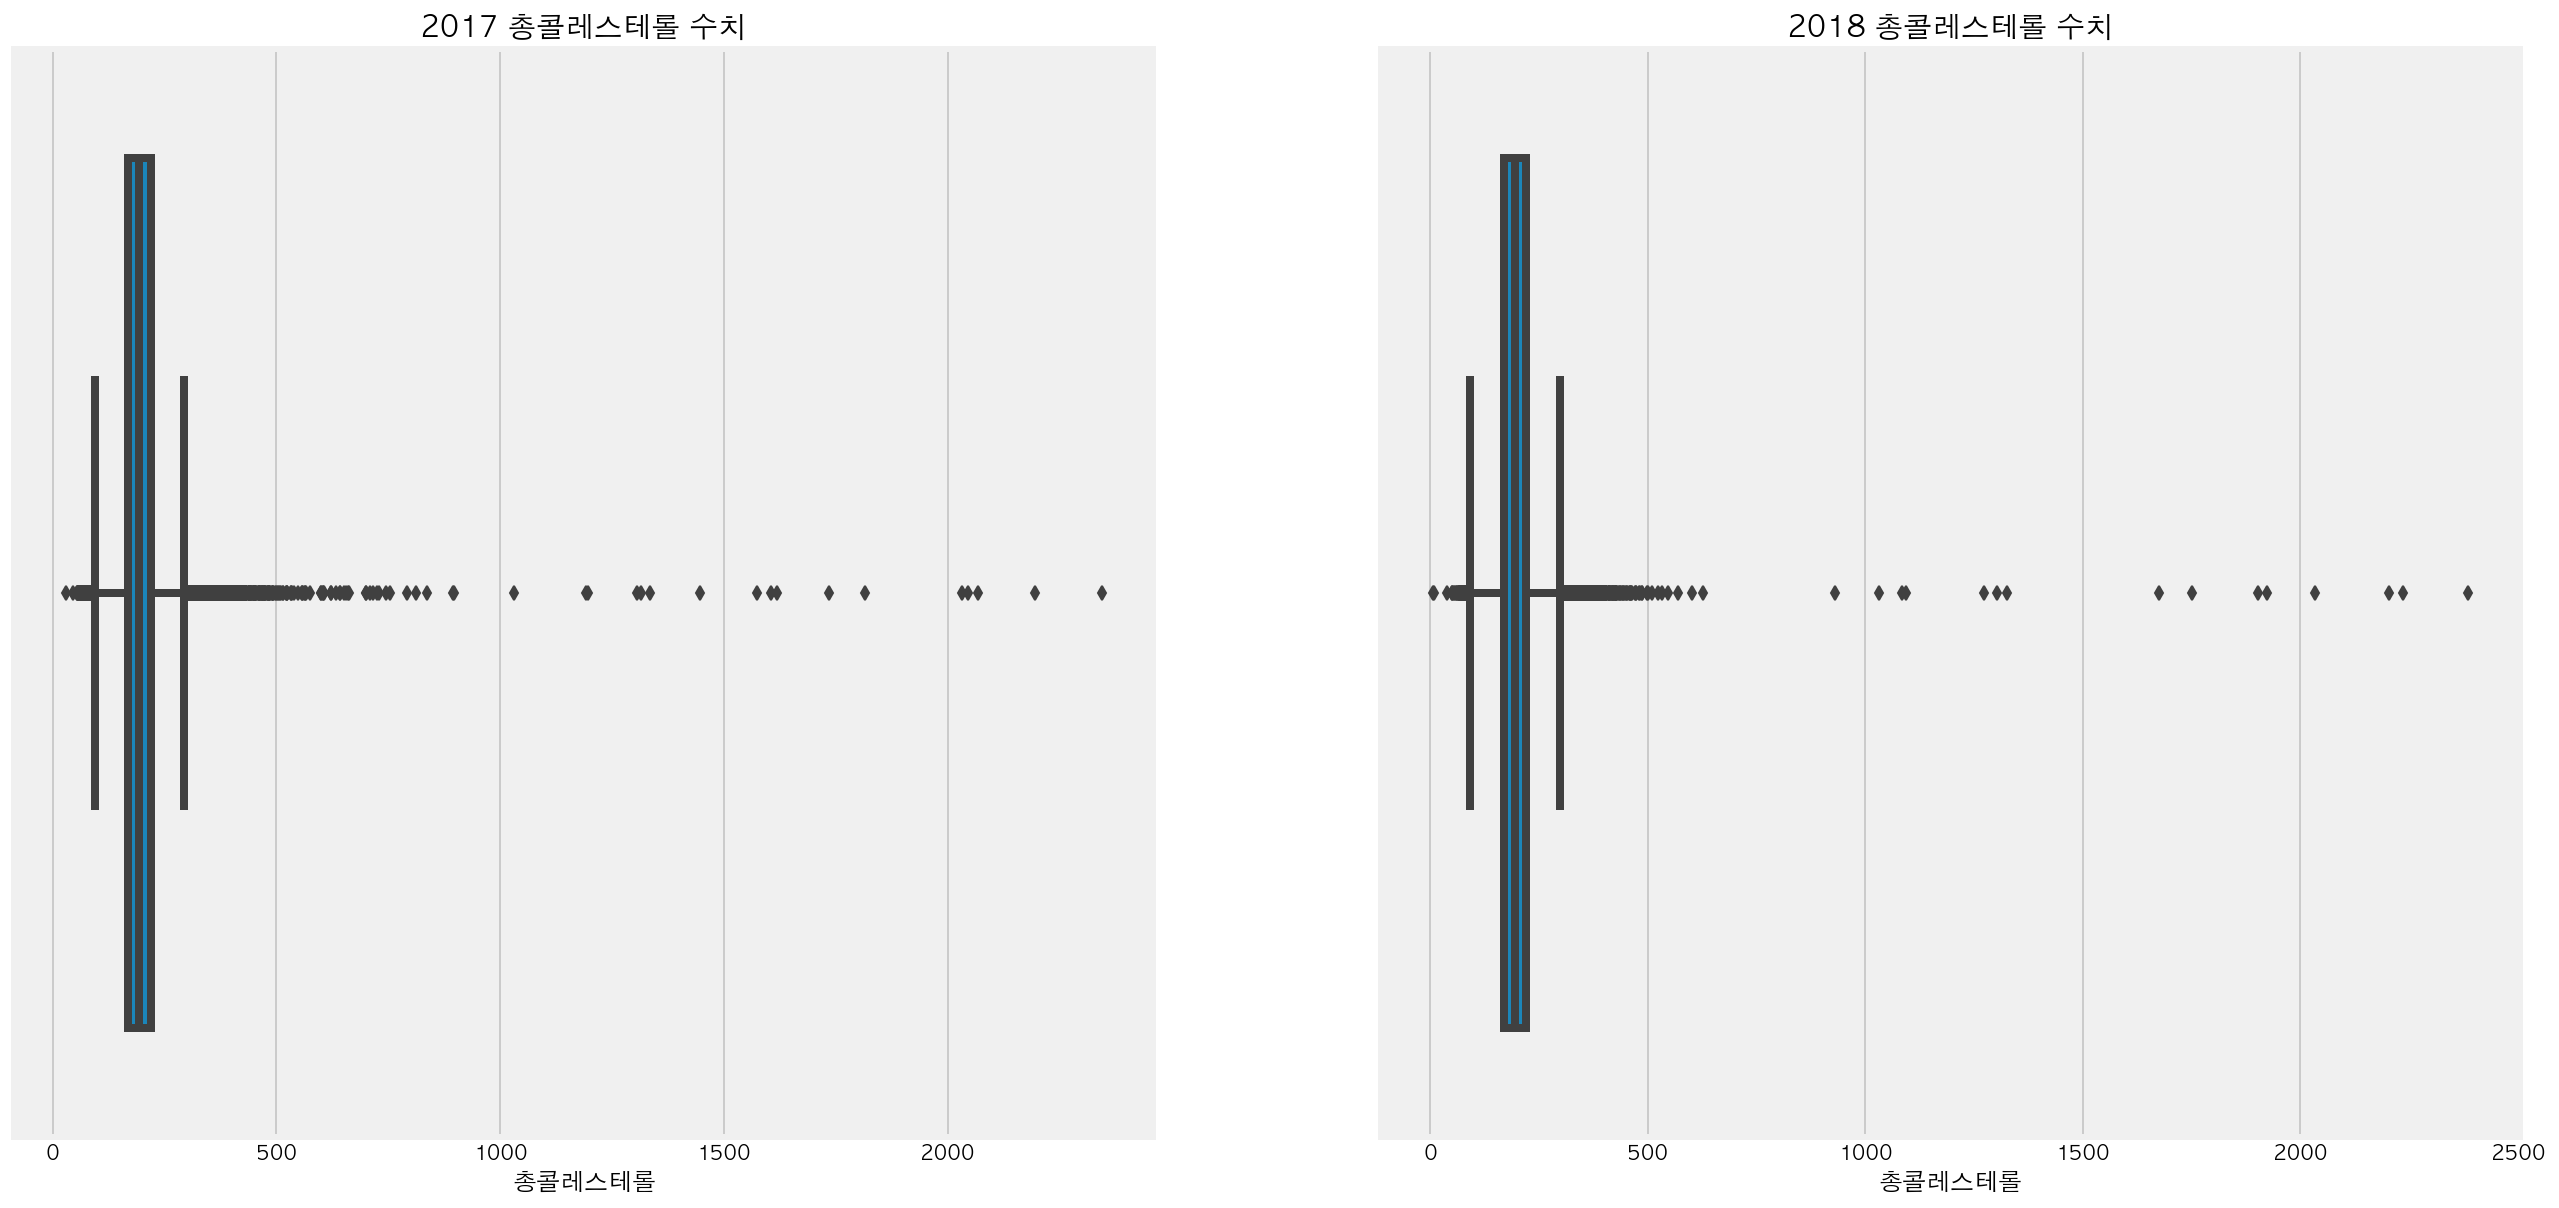

In [17]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x="총콜레스테롤", data=data1, ax=ax[0])
ax[0].set_title('2017 총콜레스테롤 수치')
sns.boxplot(x="총콜레스테롤", data=data2, ax=ax[1])
ax[1].set_title('2018 총콜레스테롤 수치')
plt.show()

outlier를 제거해줘야 한다.
수치를 몇으로 잡으면 좋지?

### 트리글리세라이드

In [18]:
print("트리글리세라이드 max :",data1['트리글리세라이드'].max())
print("트리글리세라이드 min :",data1['트리글리세라이드'].min())
print("트리글리세라이드 avg :",data1['트리글리세라이드'].mean())

트리글리세라이드 max : 9490.0
트리글리세라이드 min : 1.0
트리글리세라이드 avg : 132.67795850813286


In [19]:
print("트리글리세라이드 max :",data2['트리글리세라이드'].max())
print("트리글리세라이드 min :",data2['트리글리세라이드'].min())
print("트리글리세라이드 avg :",data2['트리글리세라이드'].mean())

트리글리세라이드 max : 4765.0
트리글리세라이드 min : 1.0
트리글리세라이드 avg : 136.16215875076634


이것 또한 max 수치가 굉장히 높게 나옴

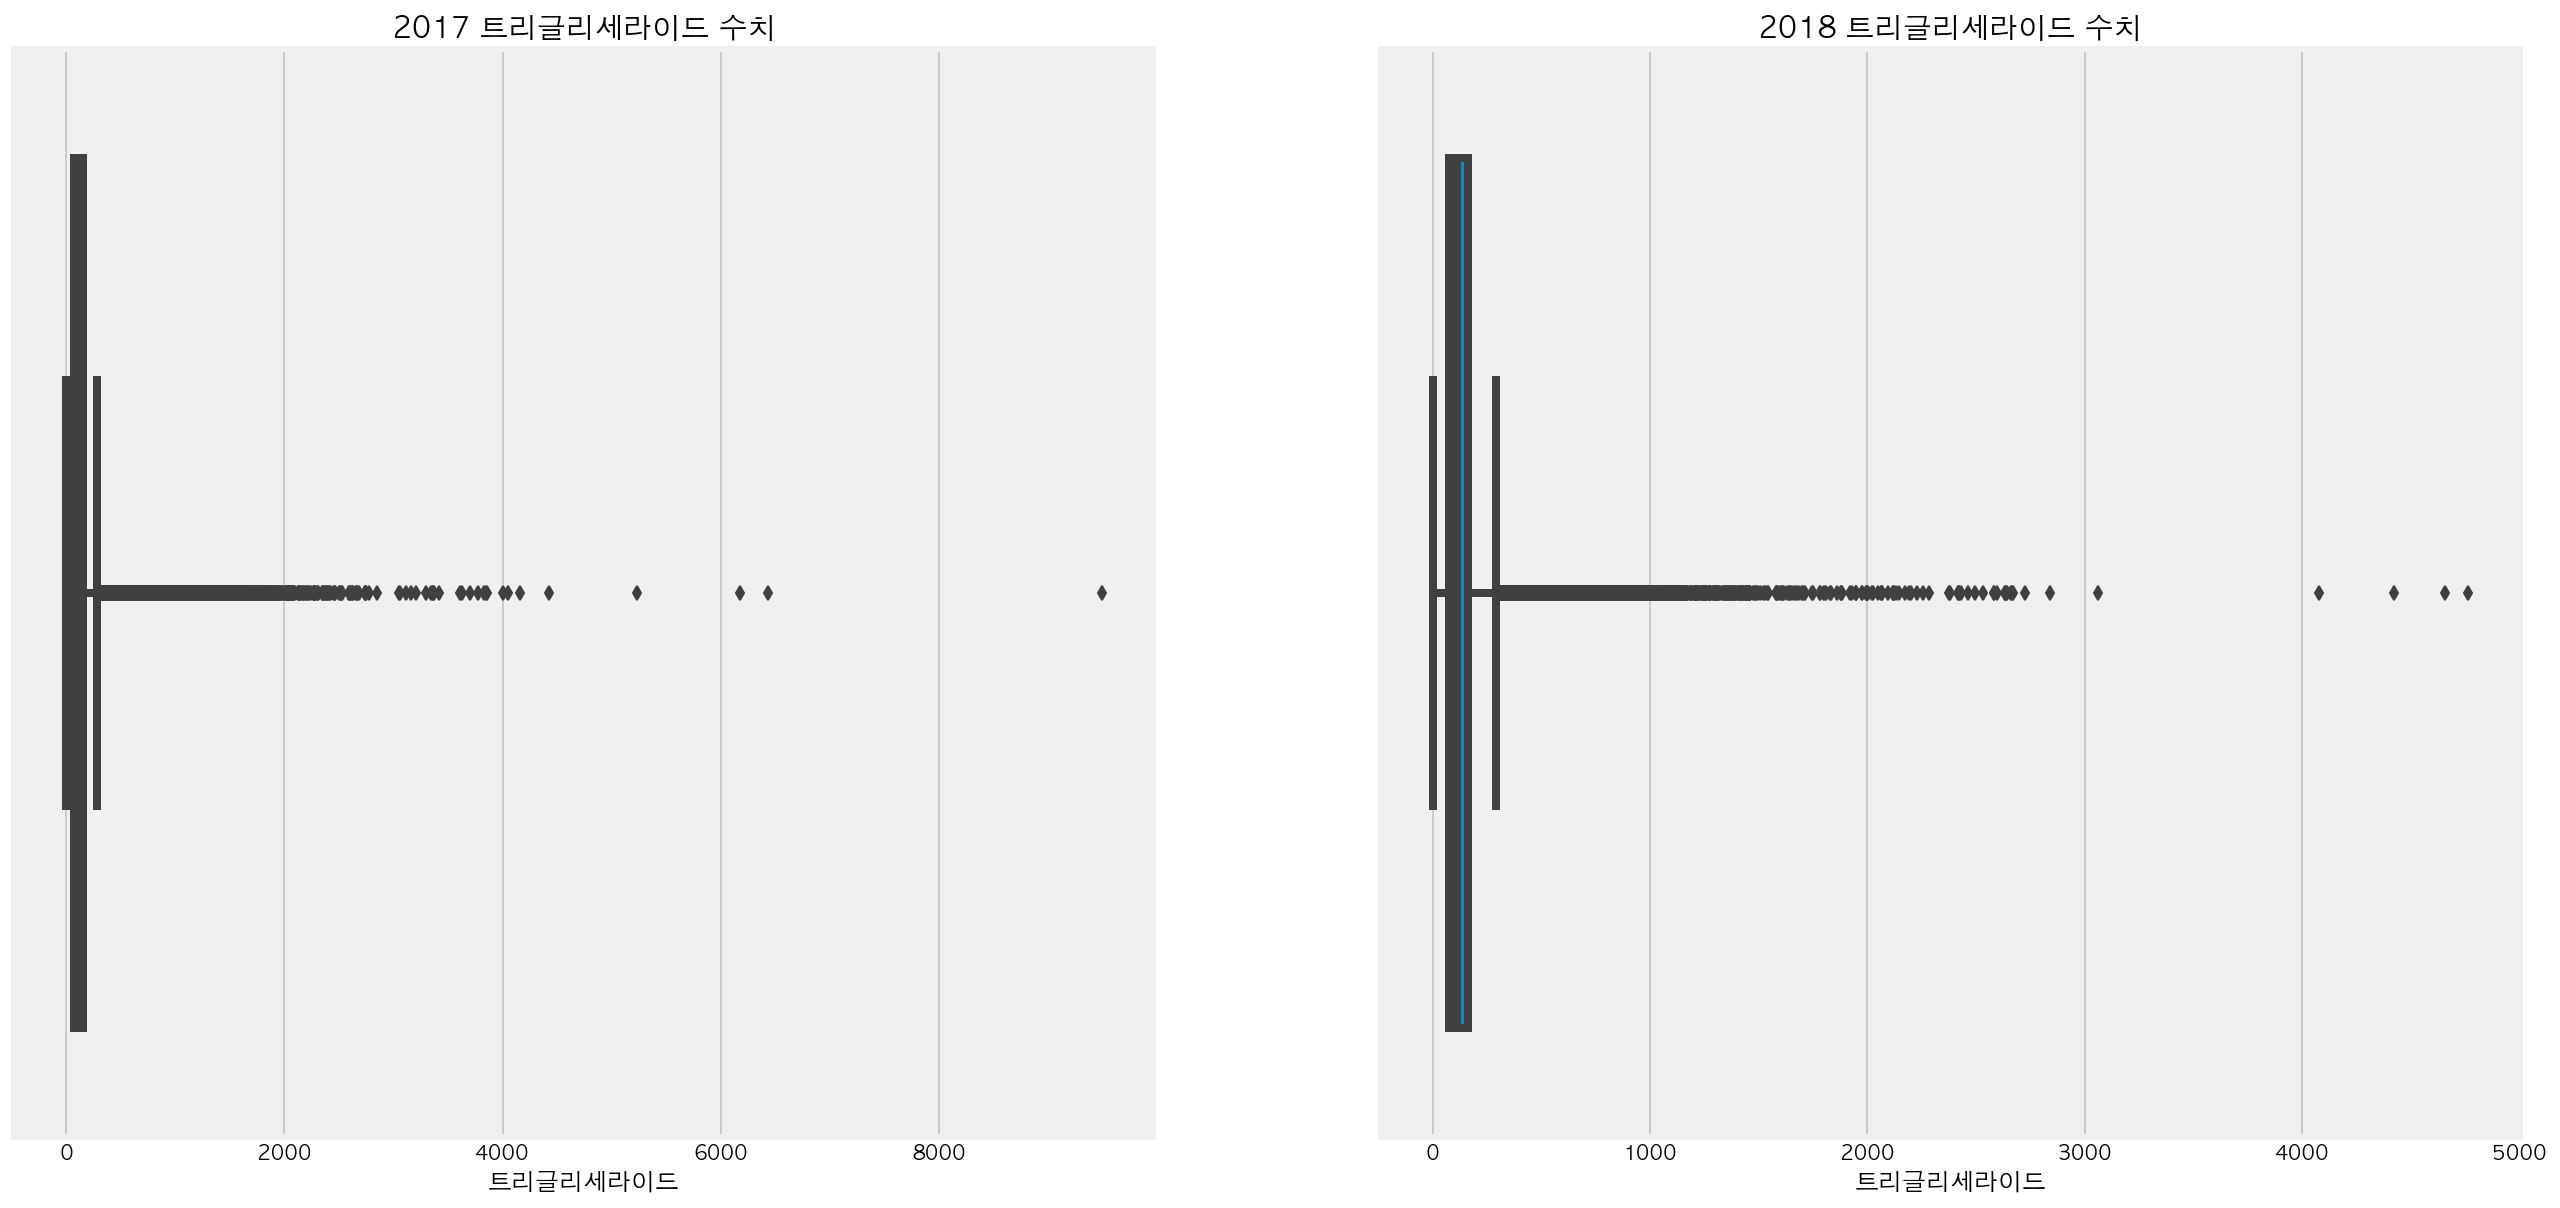

In [20]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x="트리글리세라이드", data=data1, ax=ax[0])
ax[0].set_title('2017 트리글리세라이드 수치')
sns.boxplot(x="트리글리세라이드", data=data2, ax=ax[1])
ax[1].set_title('2018 트리글리세라이드 수치')
plt.show()

### HDL콜레스테롤

In [21]:
print("HDL콜레스테롤 max :",data1['HDL콜레스테롤'].max())
print("HDL콜레스테롤 min :",data1['HDL콜레스테롤'].min())
print("HDL콜레스테롤 avg :",data1['HDL콜레스테롤'].mean())

HDL콜레스테롤 max : 8110.0
HDL콜레스테롤 min : 1.0
HDL콜레스테롤 avg : 56.938494293748924


In [22]:
print("HDL콜레스테롤 max :",data2['HDL콜레스테롤'].max())
print("HDL콜레스테롤 min :",data2['HDL콜레스테롤'].min())
print("HDL콜레스테롤 avg :",data2['HDL콜레스테롤'].mean())

HDL콜레스테롤 max : 1348.0
HDL콜레스테롤 min : 1.0
HDL콜레스테롤 avg : 56.42191341143094


8000 넘는건 좀 그렇네..

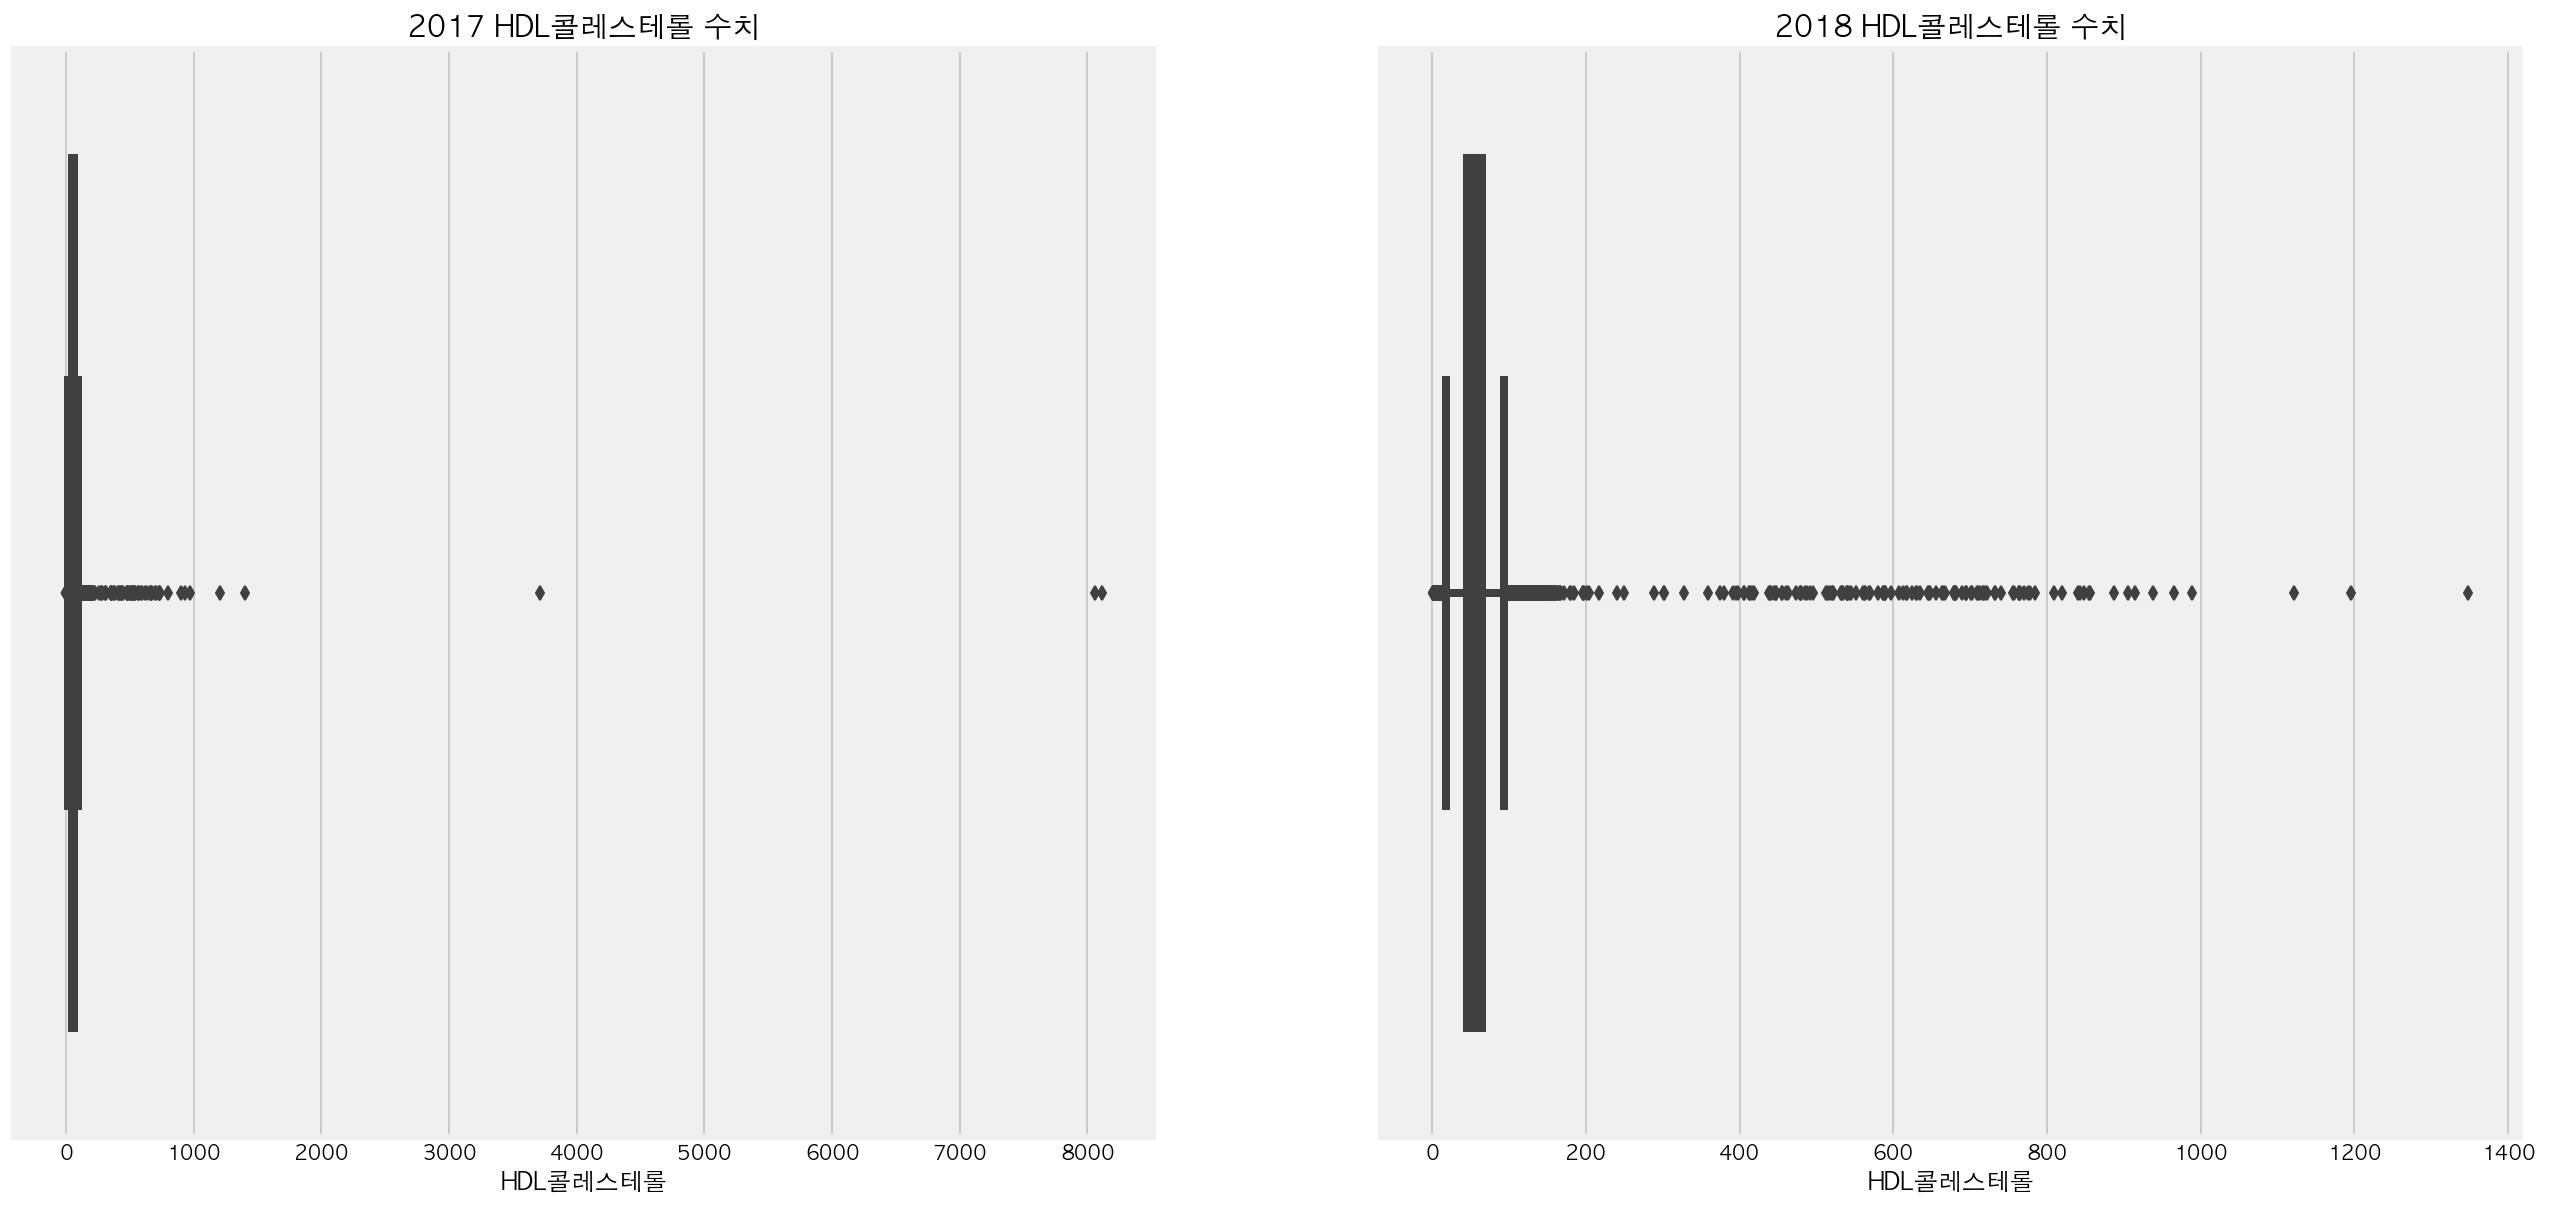

In [23]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x="HDL콜레스테롤", data=data1, ax=ax[0])
ax[0].set_title('2017 HDL콜레스테롤 수치')
sns.boxplot(x="HDL콜레스테롤", data=data2, ax=ax[1])
ax[1].set_title('2018 HDL콜레스테롤 수치')
plt.show()

### LDL콜레스테롤

In [24]:
print("LDL콜레스테롤 max :",data1['LDL콜레스테롤'].max())
print("LDL콜레스테롤 min :",data1['LDL콜레스테롤'].min())
print("LDL콜레스테롤 avg :",data1['LDL콜레스테롤'].mean())

LDL콜레스테롤 max : 5119.0
LDL콜레스테롤 min : 1.0
LDL콜레스테롤 avg : 112.99785375012036


In [25]:
print("LDL콜레스테롤 max :",data2['LDL콜레스테롤'].max())
print("LDL콜레스테롤 min :",data2['LDL콜레스테롤'].min())
print("LDL콜레스테롤 avg :",data2['LDL콜레스테롤'].mean())

LDL콜레스테롤 max : 2332.0
LDL콜레스테롤 min : 1.0
LDL콜레스테롤 avg : 113.43928095790449


ㅋㅋㅋ 정상적인 데이터가 하나도없네

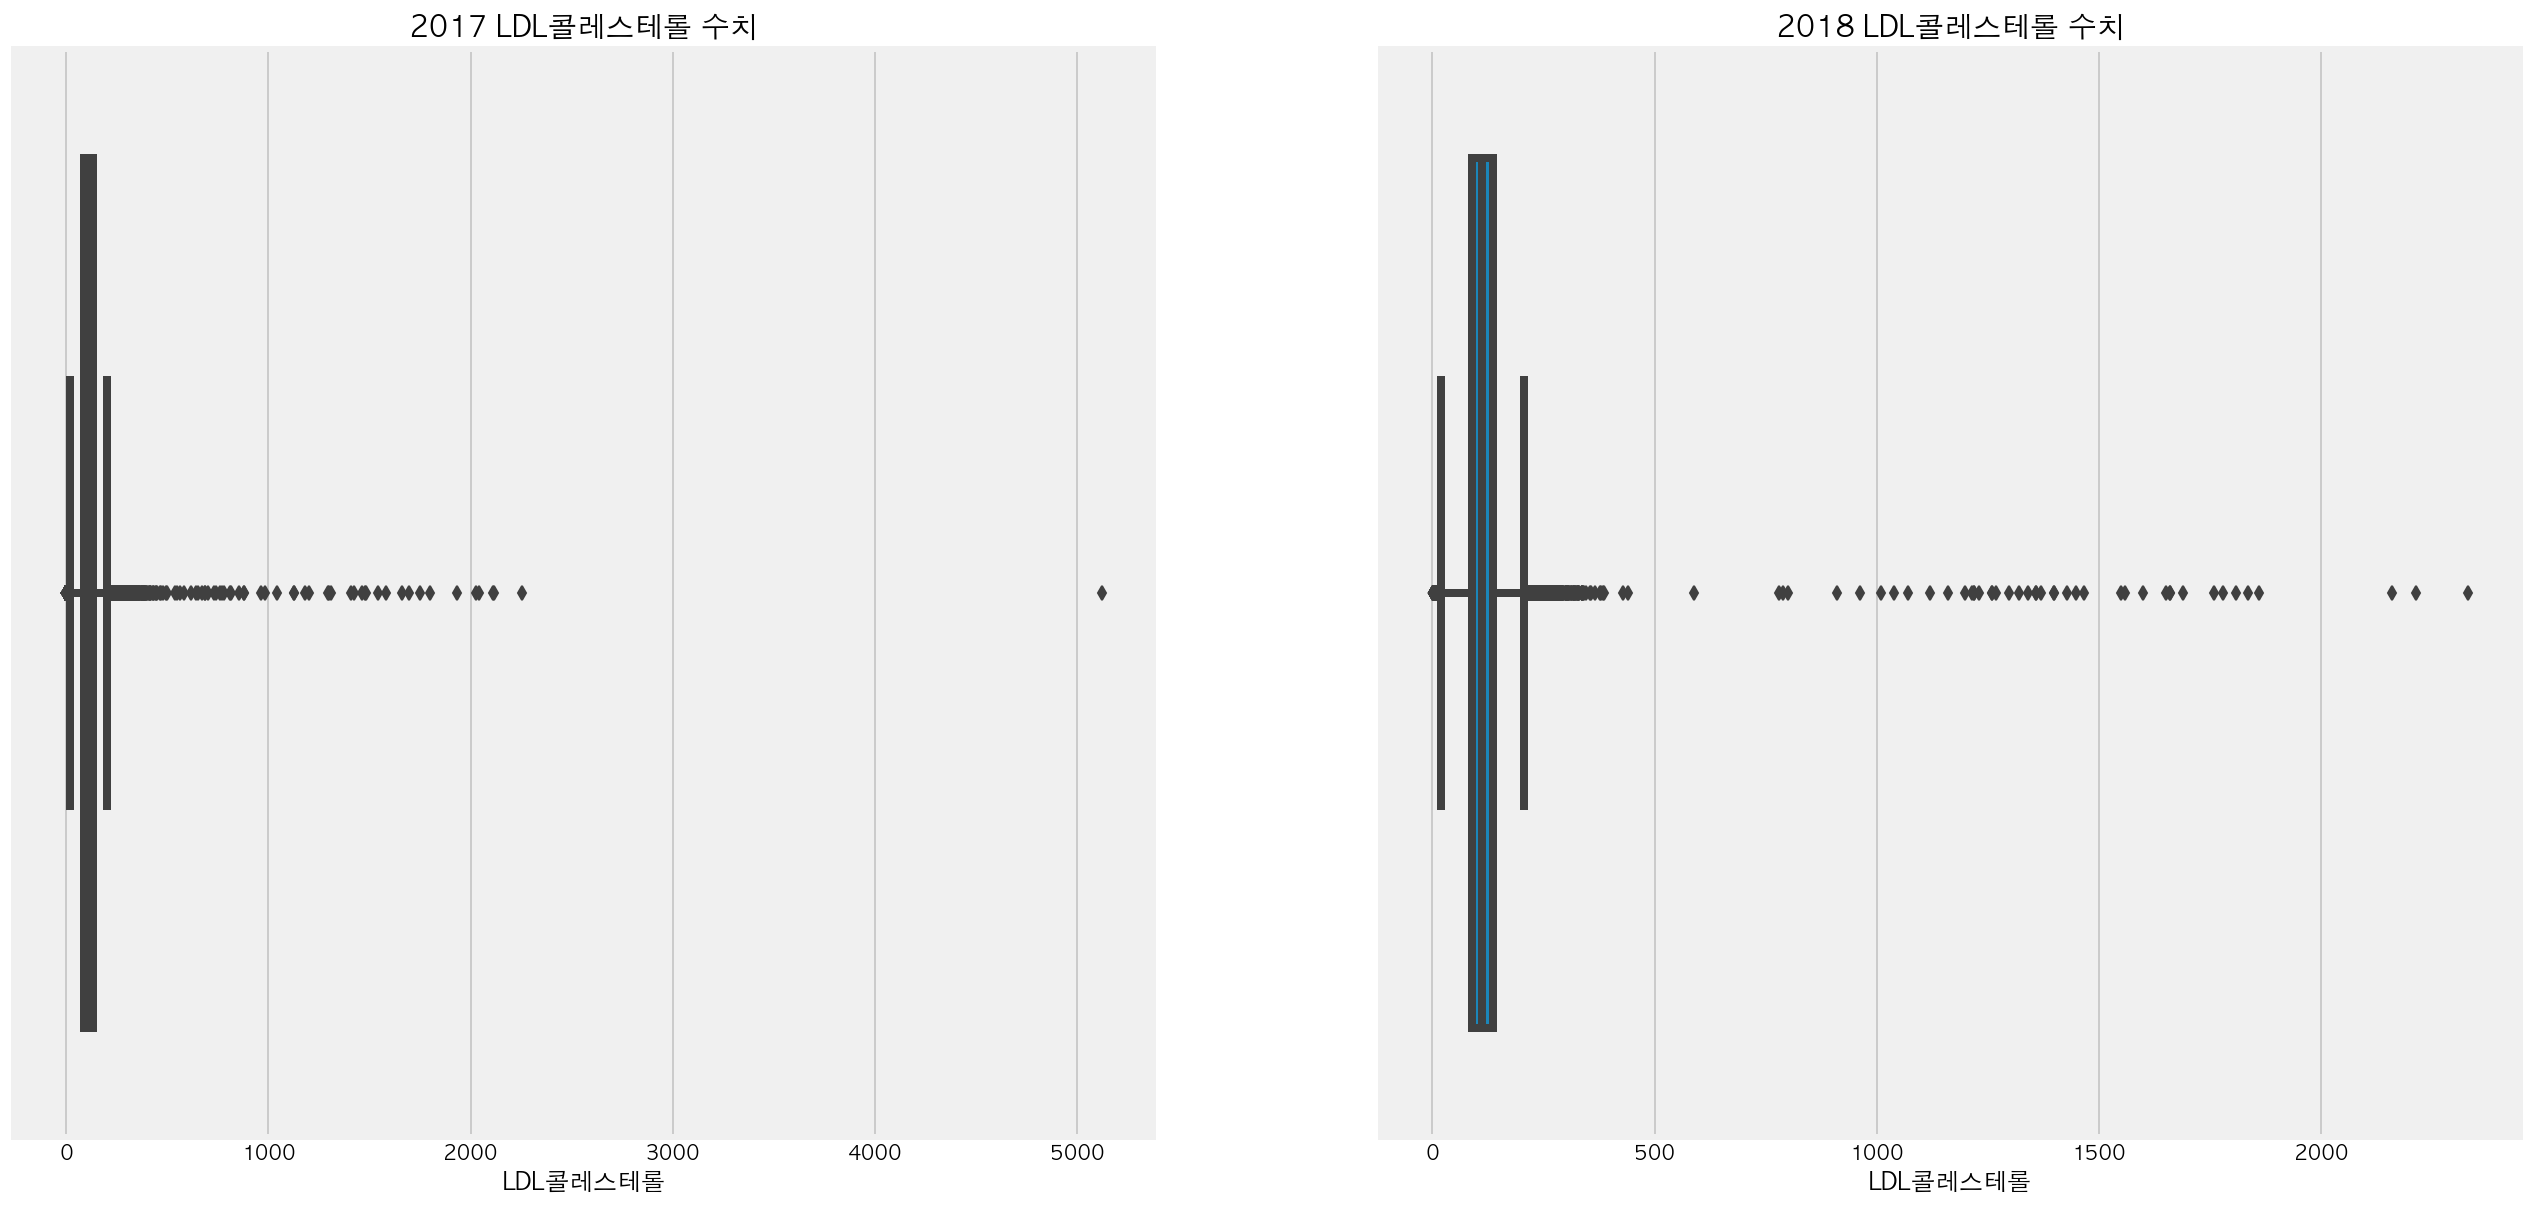

In [26]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x="LDL콜레스테롤", data=data1, ax=ax[0])

ax[0].set_title('2017 LDL콜레스테롤 수치')
sns.boxplot(x="LDL콜레스테롤", data=data2, ax=ax[1])
ax[1].set_title('2018 LDL콜레스테롤 수치')
plt.show()

네 개의 데이터 전부 이상치(outlier)가 존재한다.   
이 이상치들을 어떻게 처리할 것인가???
 - 제거하거나
 - 다른 값으로 변환 후 사용한다.
 
변환 할거면, 어떻게 변환할까?
 1. 단순히 제거 : 제거하는 데이터가 매우 적을때만
 2. 통계 기반 : 평균으로 바꾸기

### IQR을 이용한 이상치 제거

**IQR (Inter Quartile Range ) :** 1분위수와 3분위수 즉, 데이터를 크기 순서로 정렬했을 때, 25% ~ 75% 범위를 의미함.   
그리고 각 분위수로부터 이 구간 길이의 1.5배 범위 (아래 Box-plot에서 whisker를 의미함) 를 넘어 설 경우 outlier로 판단하여 제거함.

In [27]:
df = data1.copy()

In [28]:
for c in df.columns:
    if df[c].dtype == float or df[c].dtype == int:
        q1 = df[c].quantile(.25)
        q3 = df[c].quantile(.75)
        IQR = q3 - q1
        df = df[df[c].between(q1 - 1.5 * IQR, q3 + 1.5 * IQR, inclusive=True)]
        print("Column : " + c + "\'s outliers which out of IQR are removed.")
df.reset_index(drop=True, inplace=True)

Column : 식전혈당(공복혈당)'s outliers which out of IQR are removed.
Column : 총콜레스테롤's outliers which out of IQR are removed.
Column : 트리글리세라이드's outliers which out of IQR are removed.
Column : HDL콜레스테롤's outliers which out of IQR are removed.
Column : LDL콜레스테롤's outliers which out of IQR are removed.


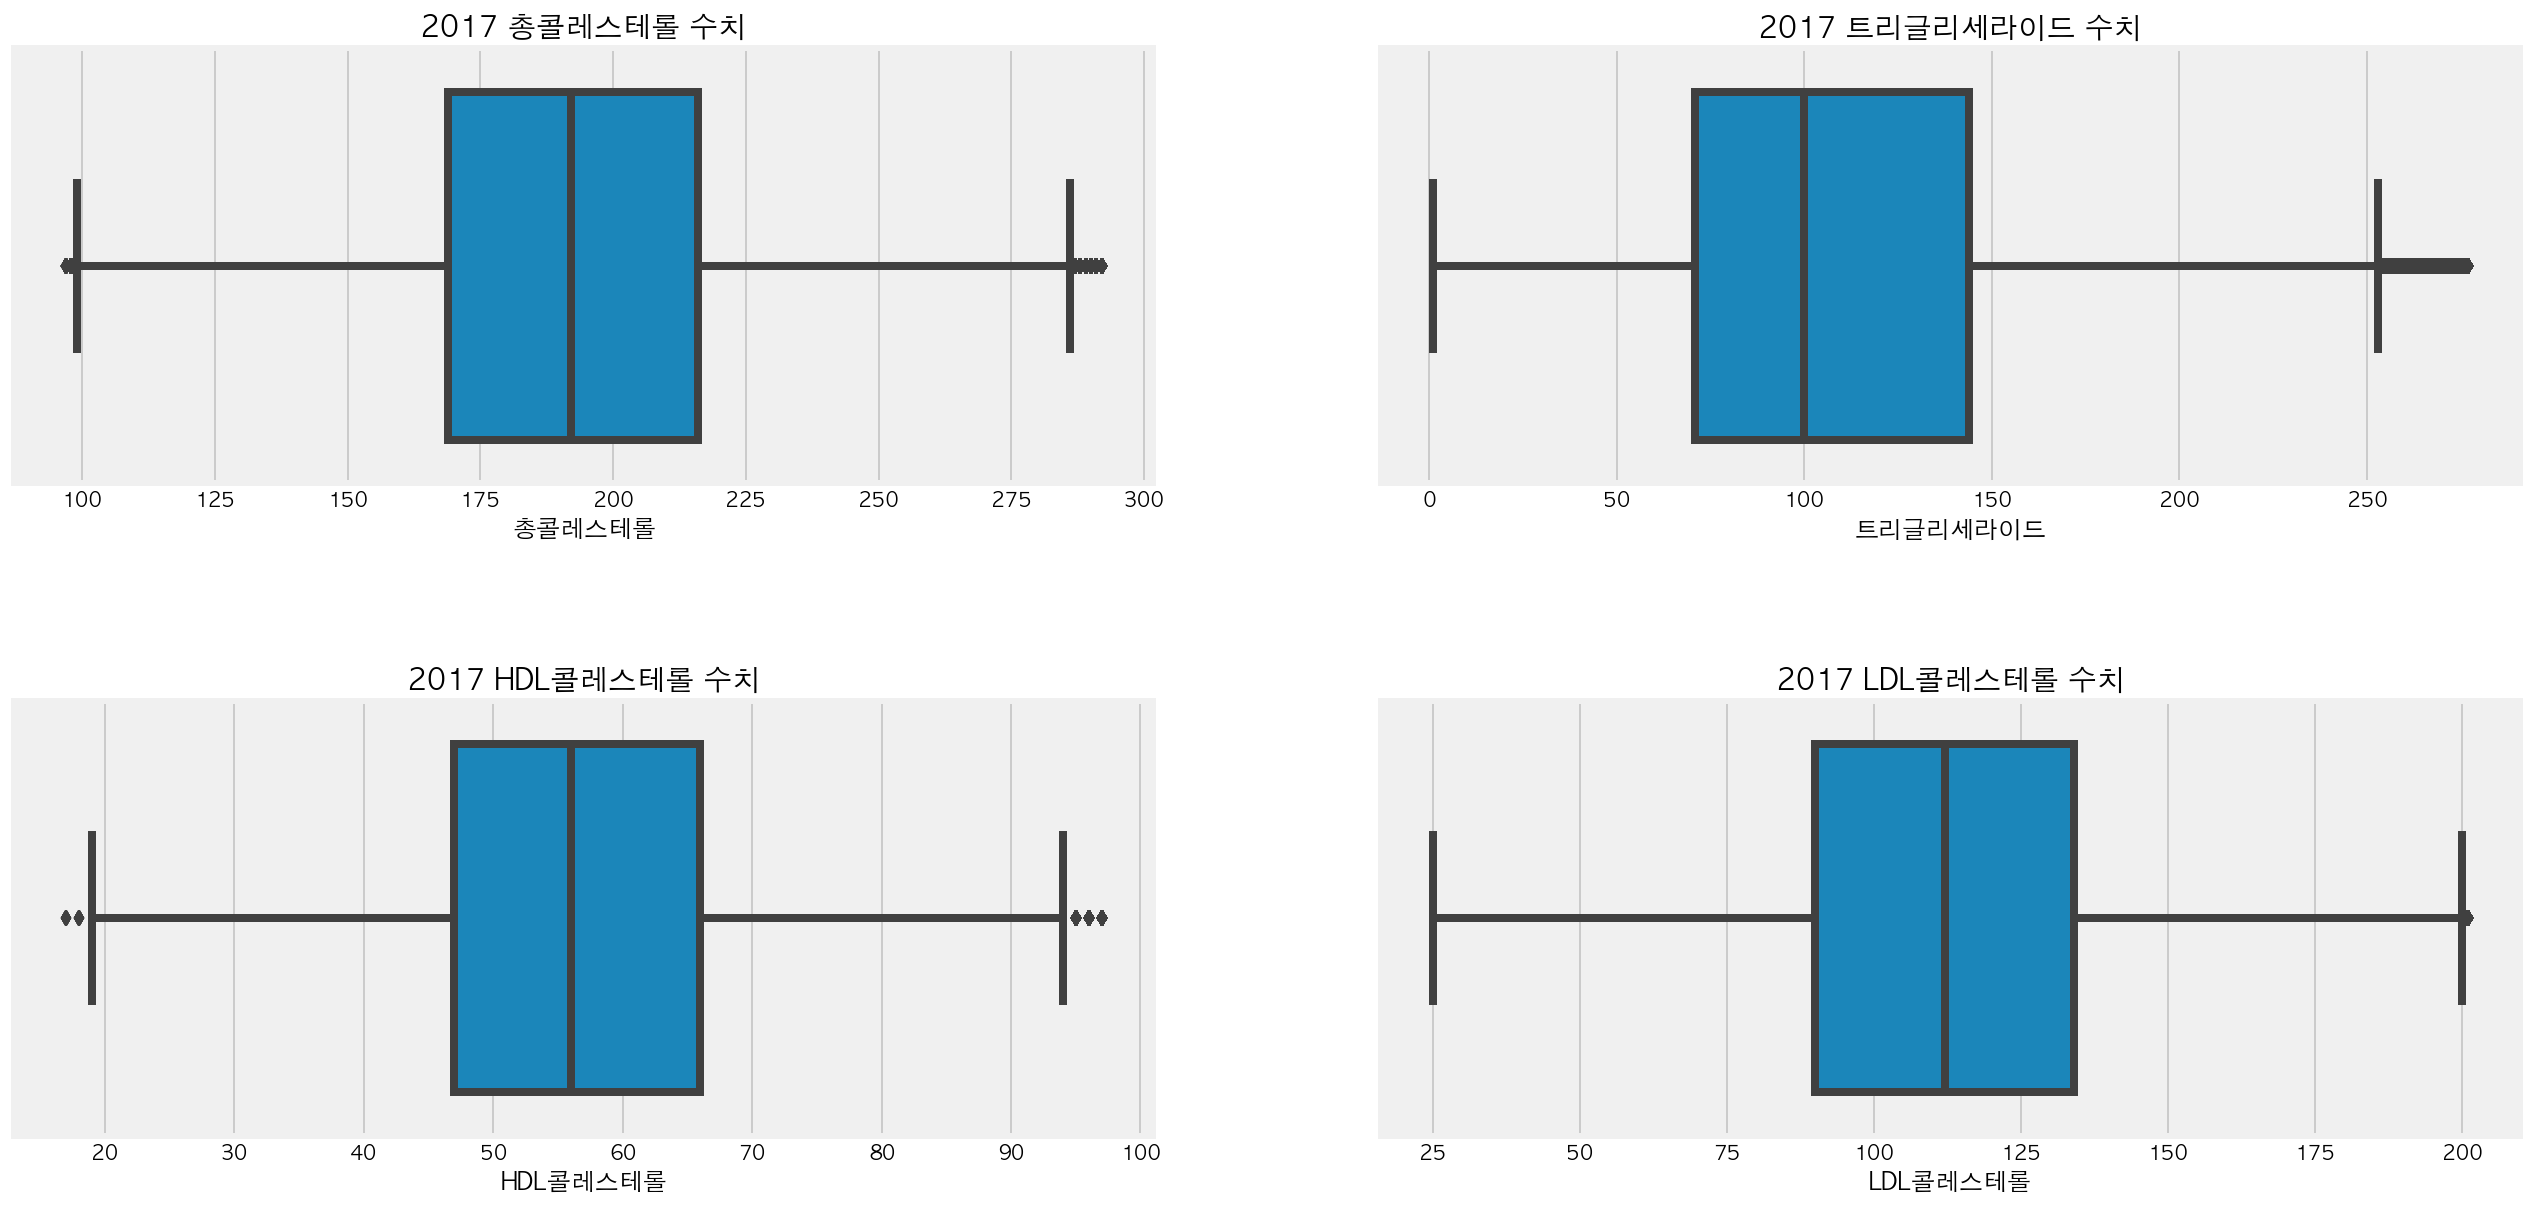

In [29]:
f, ax = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(x="총콜레스테롤", data=df, ax=ax[0,0])
ax[0,0].set_title('2017 총콜레스테롤 수치')
sns.boxplot(x="트리글리세라이드", data=df, ax=ax[0,1])
ax[0,1].set_title('2017 트리글리세라이드 수치')
sns.boxplot(x="HDL콜레스테롤", data=df, ax=ax[1,0])
ax[1,0].set_title('2017 HDL콜레스테롤 수치')
sns.boxplot(x="LDL콜레스테롤", data=df, ax=ax[1,1])
ax[1,1].set_title('2017 LDL콜레스테롤 수치')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [30]:
df2 = data2.copy()

In [31]:
for c in df2.columns:
    if df2[c].dtype == float or df2[c].dtype == int:
        q1 = df2[c].quantile(.25)
        q3 = df2[c].quantile(.75)
        IQR = q3 - q1
        df2 = df2[df2[c].between(q1 - 1.5 * IQR, q3 + 1.5 * IQR, inclusive=True)]
        print("Column : " + c + "\'s outliers which out of IQR are removed.")
df2.reset_index(drop=True, inplace=True)

Column : 식전혈당(공복혈당)'s outliers which out of IQR are removed.
Column : 총콜레스테롤's outliers which out of IQR are removed.
Column : 트리글리세라이드's outliers which out of IQR are removed.
Column : HDL콜레스테롤's outliers which out of IQR are removed.
Column : LDL콜레스테롤's outliers which out of IQR are removed.


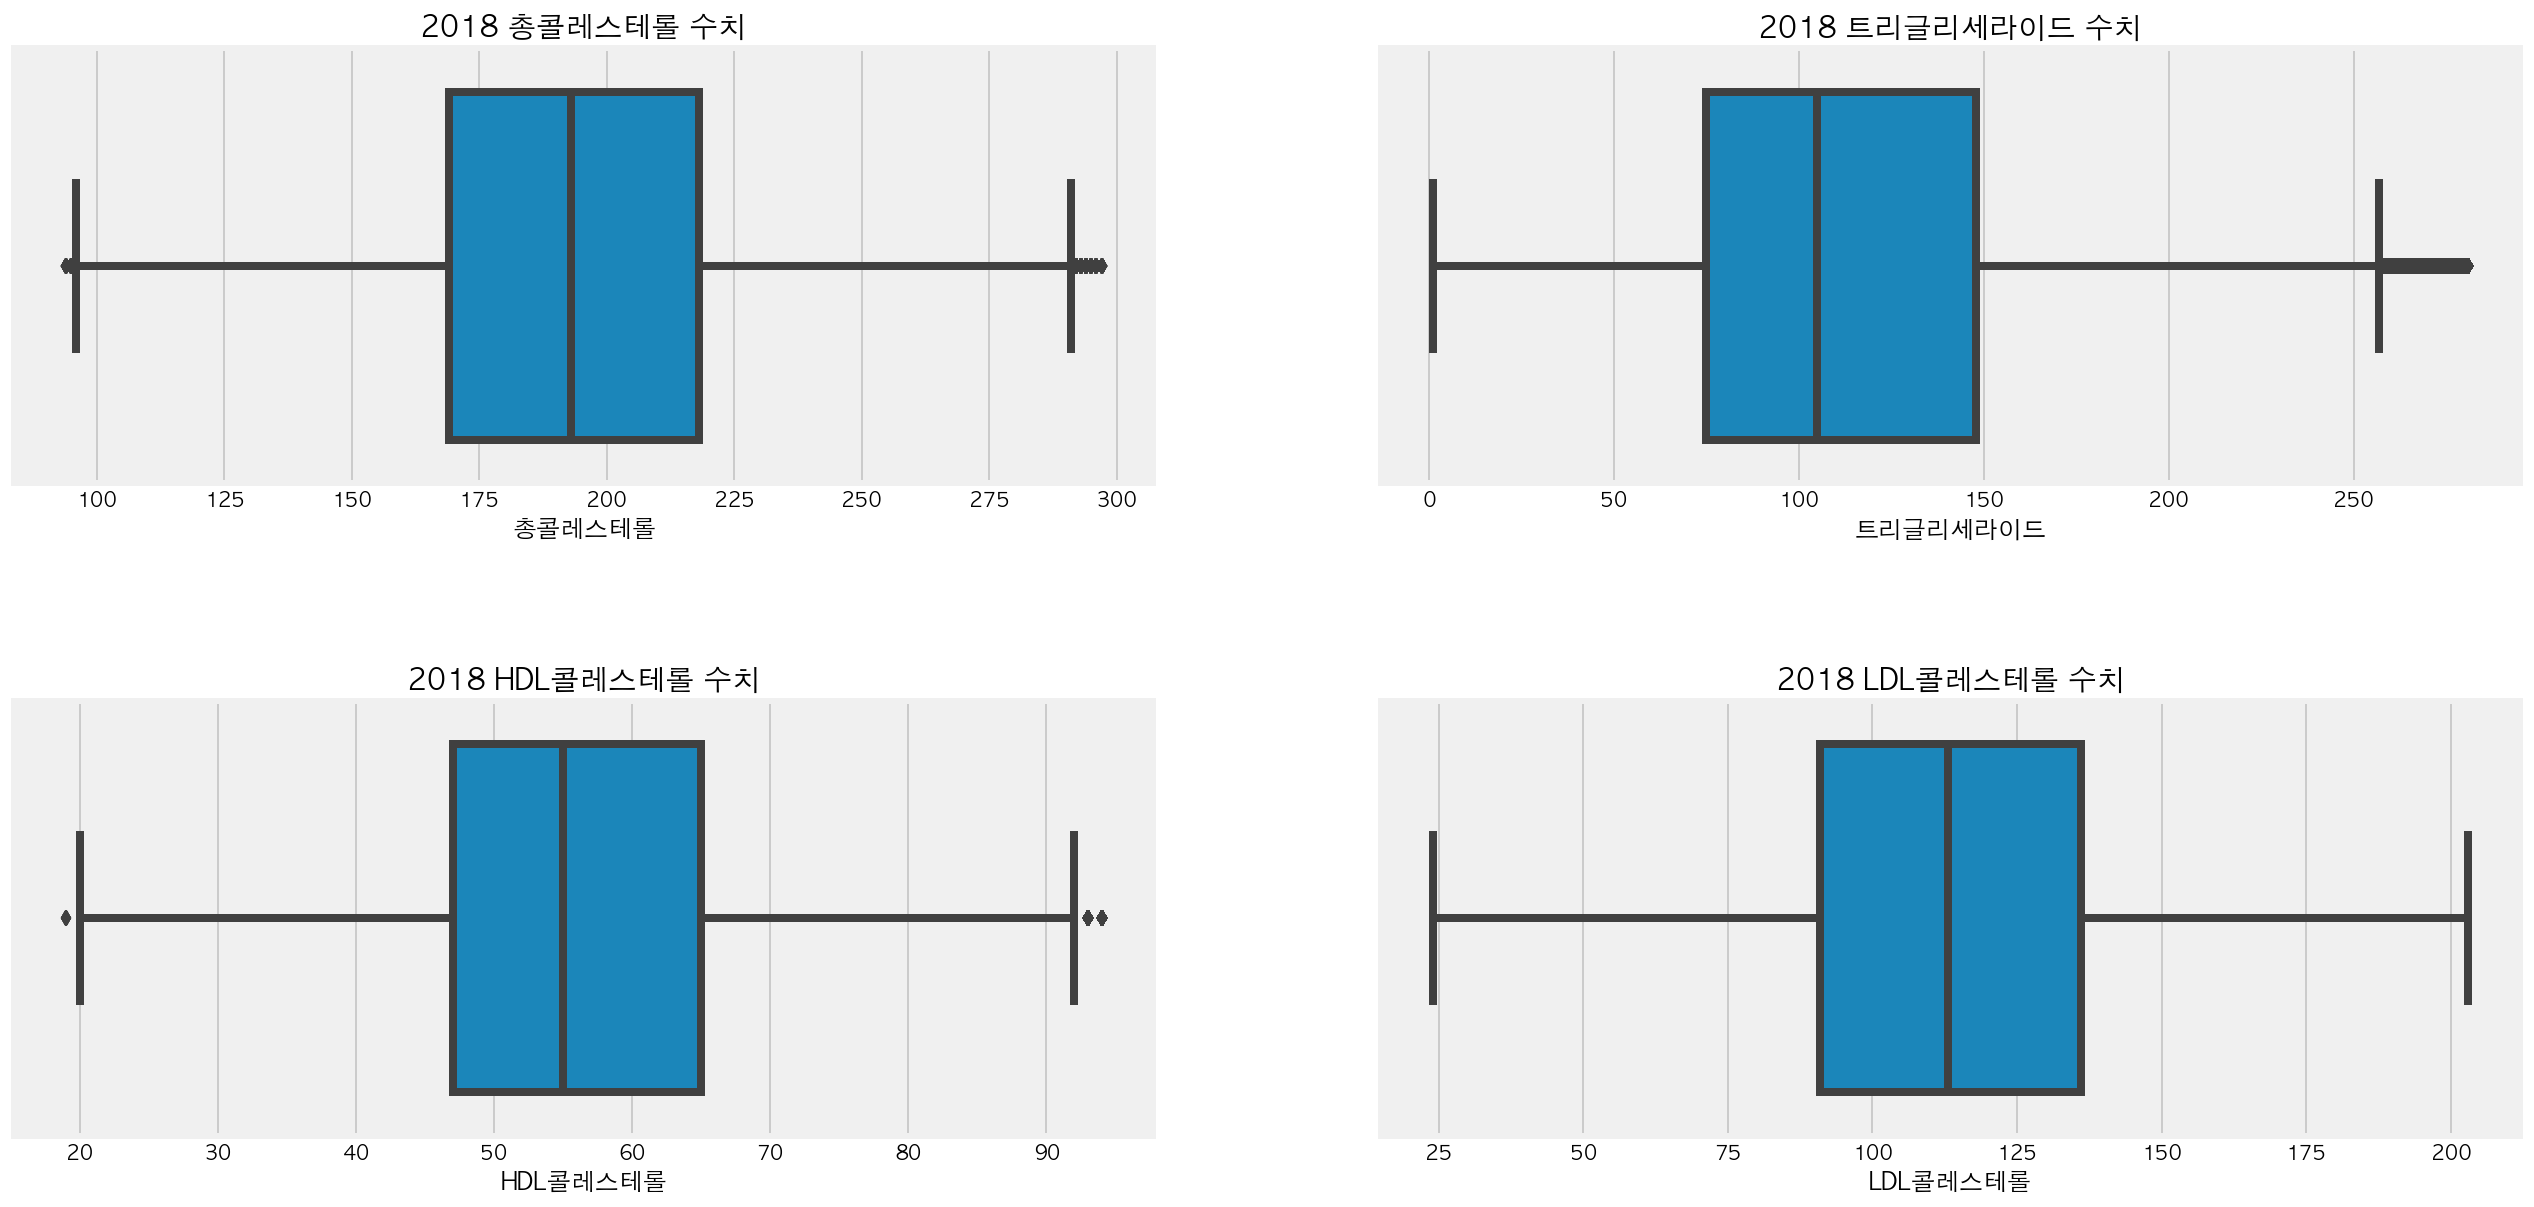

In [32]:
f, ax = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(x="총콜레스테롤", data=df2, ax=ax[0,0])
ax[0,0].set_title('2018 총콜레스테롤 수치')
sns.boxplot(x="트리글리세라이드", data=df2, ax=ax[0,1])
ax[0,1].set_title('2018 트리글리세라이드 수치')
sns.boxplot(x="HDL콜레스테롤", data=df2, ax=ax[1,0])
ax[1,0].set_title('2018 HDL콜레스테롤 수치')
sns.boxplot(x="LDL콜레스테롤", data=df2, ax=ax[1,1])
ax[1,1].set_title('2018 LDL콜레스테롤 수치')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

## 결측값(null)값 채우기

### 이상치를 전부 제거한 후의 데이터 개수

In [33]:
print(len(df)," / ",len(df2))

910693  /  304255


 2017년은 약 9만개, 2018년은 무려 70만개의 데이터가 제거되었다.   
너무 많은 데이터가 사라졌다..

따라서 이상치를 제거한 이후의 평균을 원래 데이터의 null값에 채웠다.

### 2017년도

In [34]:
print("총콜레스테롤 avg :",df['총콜레스테롤'].mean())
print("트리글리세라이드 avg :",df['트리글리세라이드'].mean())
print("HDL콜레스테롤 avg :",df['HDL콜레스테롤'].mean())
print("LDL콜레스테롤 avg :",df['LDL콜레스테롤'].mean())

총콜레스테롤 avg : 192.31369517499311
트리글리세라이드 avg : 115.17422336616181
HDL콜레스테롤 avg : 56.81935734654818
LDL콜레스테롤 avg : 112.39949906280162


In [35]:
tmp1 = df['총콜레스테롤'].mean()
tmp2 = df['트리글리세라이드'].mean()
tmp3 = df['HDL콜레스테롤'].mean()
tmp4 = df['LDL콜레스테롤'].mean()

In [36]:
data1.fillna({'총콜레스테롤': tmp1,
                   '트리글리세라이드': tmp2,
                   'HDL콜레스테롤': tmp3,
                  'LDL콜레스테롤' : tmp4},
                  inplace=True)

In [37]:
data1.isnull().sum()

총콜레스테롤      0
트리글리세라이드    0
HDL콜레스테롤    0
LDL콜레스테롤    0
dtype: int64

### 2018년도

In [38]:
print("총콜레스테롤 avg :",df2['총콜레스테롤'].mean())
print("트리글리세라이드 avg :",df2['트리글리세라이드'].mean())
print("HDL콜레스테롤 avg :",df2['HDL콜레스테롤'].mean())
print("LDL콜레스테롤 avg :",df2['LDL콜레스테롤'].mean())

총콜레스테롤 avg : 192.8280422671772
트리글리세라이드 avg : 119.19088593449574
HDL콜레스테롤 avg : 56.039673957699954
LDL콜레스테롤 avg : 112.87624854151944


In [39]:
tmp1 = df2['총콜레스테롤'].mean()
tmp2 = df2['트리글리세라이드'].mean()
tmp3 = df2['HDL콜레스테롤'].mean()
tmp4 = df2['LDL콜레스테롤'].mean()

In [40]:
data2.fillna({'총콜레스테롤': tmp1,
                   '트리글리세라이드': tmp2,
                   'HDL콜레스테롤': tmp3,
                  'LDL콜레스테롤' : tmp4},
                  inplace=True)

In [41]:
data2.isnull().sum()

총콜레스테롤      0
트리글리세라이드    0
HDL콜레스테롤    0
LDL콜레스테롤    0
dtype: int64

## 변경 후

In [42]:
for c in data1.columns:
    if data1[c].dtype == float or data1[c].dtype == int:
        q1 = data1[c].quantile(.25)
        q3 = data1[c].quantile(.75)
        IQR = q3 - q1
        data1 = data1[data1[c].between(q1 - 1.5 * IQR, q3 + 1.5 * IQR, inclusive=True)]
        print("Column : " + c + "\'s outliers which out of IQR are removed.")
data1.reset_index(drop=True, inplace=True)

Column : 총콜레스테롤's outliers which out of IQR are removed.
Column : 트리글리세라이드's outliers which out of IQR are removed.
Column : HDL콜레스테롤's outliers which out of IQR are removed.
Column : LDL콜레스테롤's outliers which out of IQR are removed.


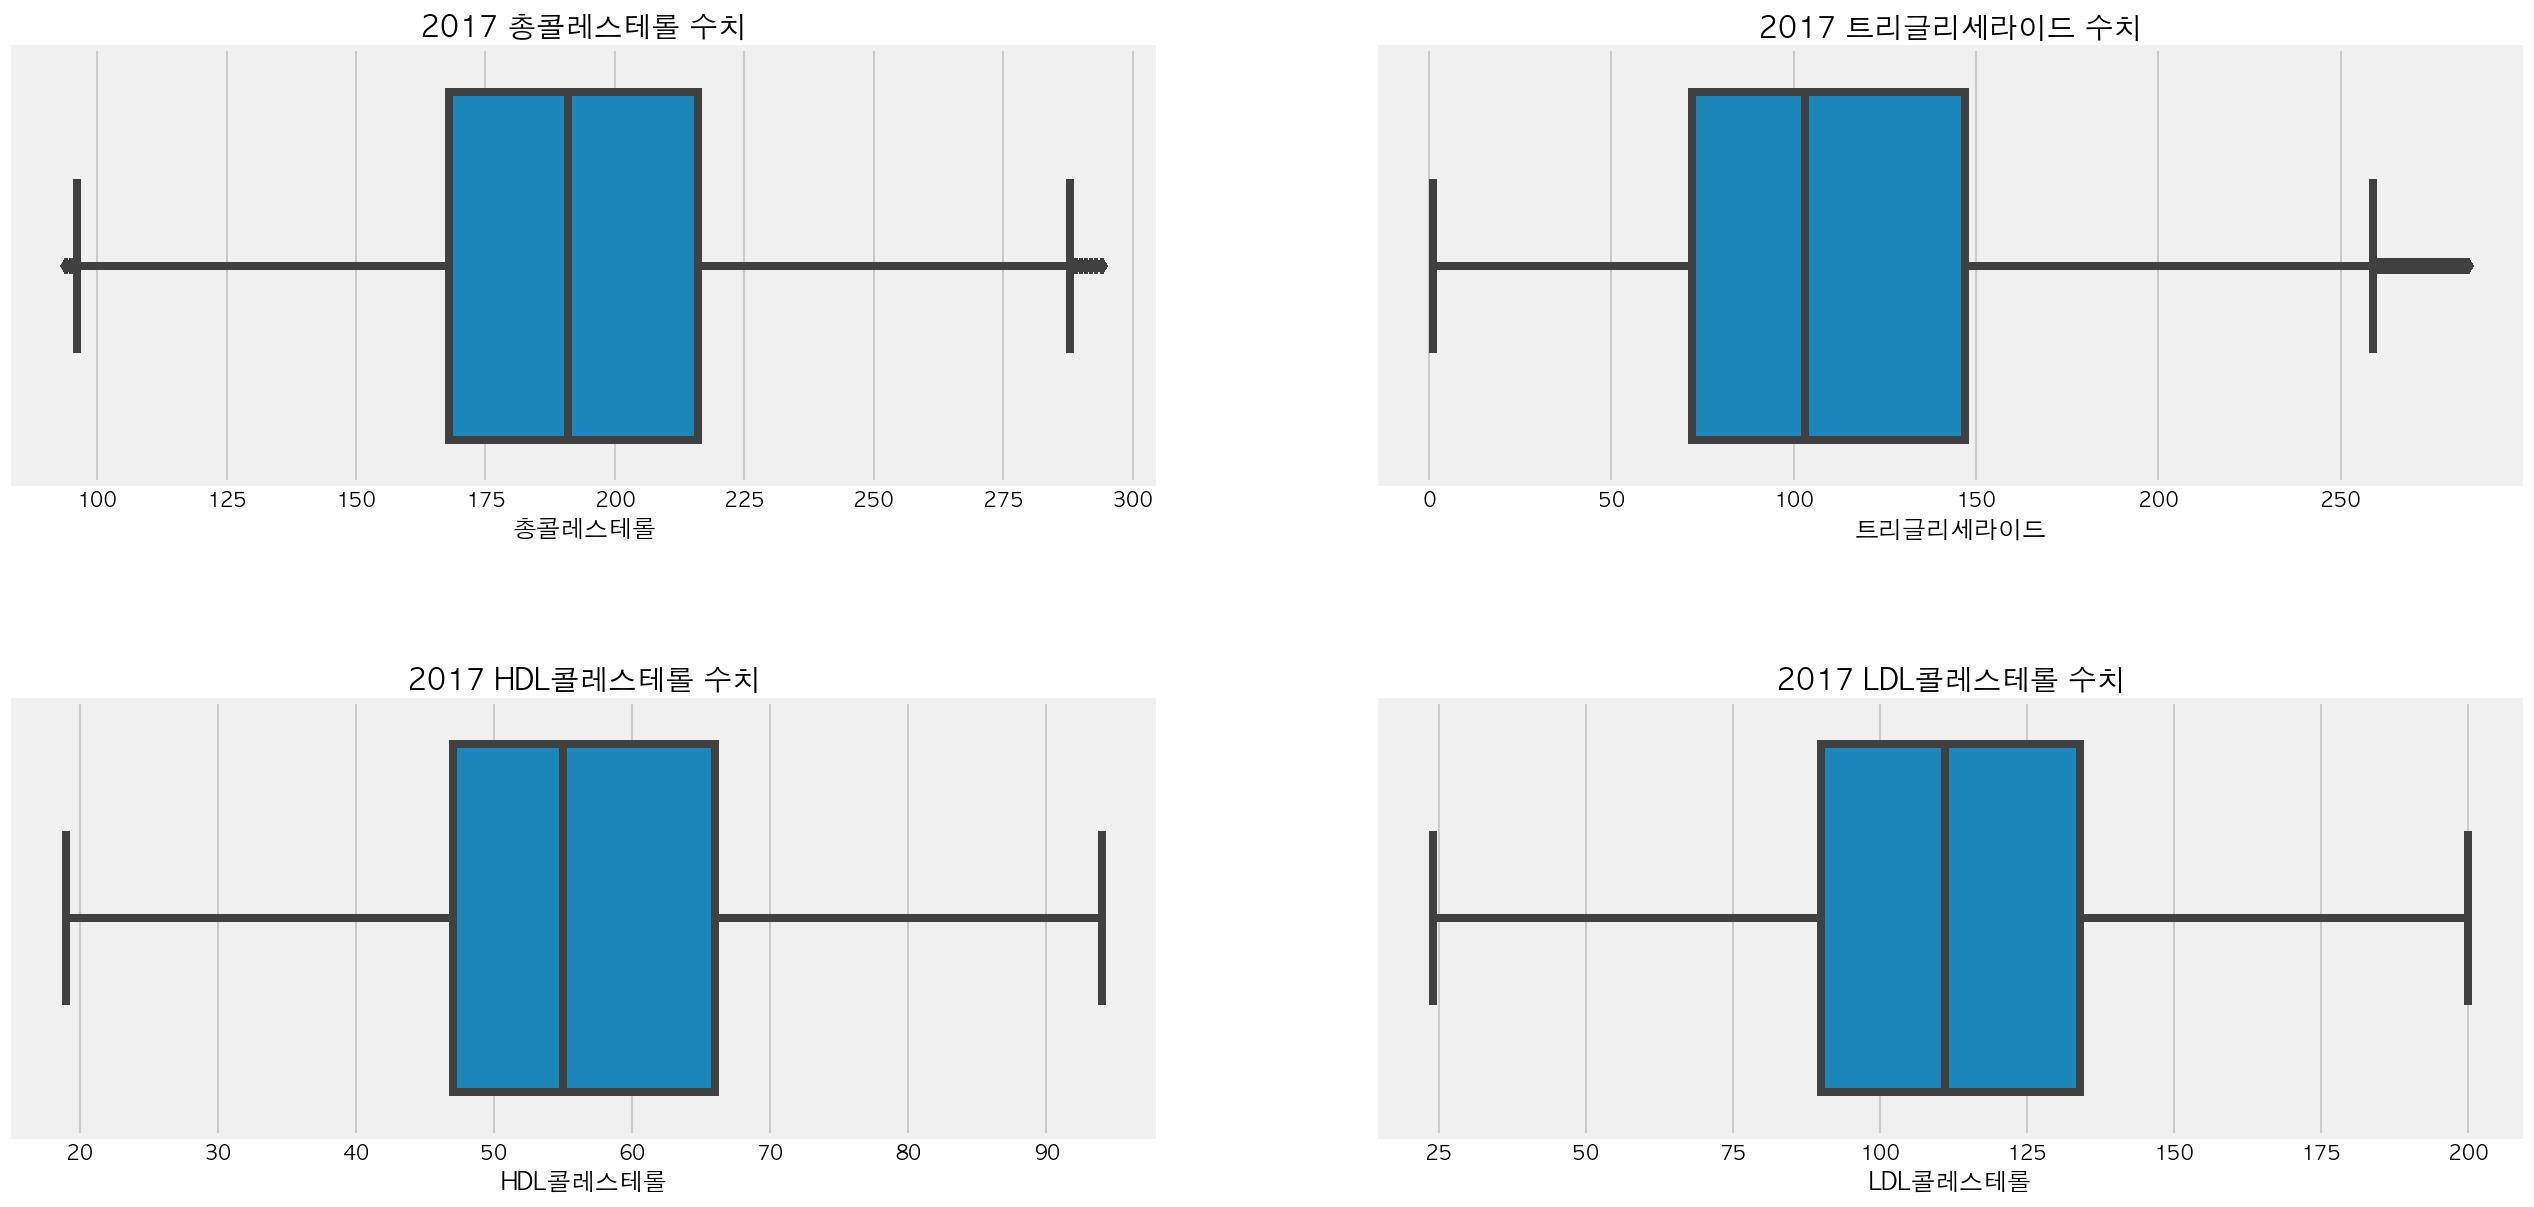

In [43]:
f, ax = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(x="총콜레스테롤", data=data1, ax=ax[0,0])
ax[0,0].set_title('2017 총콜레스테롤 수치')
sns.boxplot(x="트리글리세라이드", data=data1, ax=ax[0,1])
ax[0,1].set_title('2017 트리글리세라이드 수치')
sns.boxplot(x="HDL콜레스테롤", data=data1, ax=ax[1,0])
ax[1,0].set_title('2017 HDL콜레스테롤 수치')
sns.boxplot(x="LDL콜레스테롤", data=data1, ax=ax[1,1])
ax[1,1].set_title('2017 LDL콜레스테롤 수치')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [44]:
len(data1)

912216

In [45]:
for c in data2.columns:
    if data2[c].dtype == float or data2[c].dtype == int:
        q1 = data2[c].quantile(.25)
        q3 = data2[c].quantile(.75)
        IQR = q3 - q1
        data2 = data2[data2[c].between(q1 - 1.5 * IQR, q3 + 1.5 * IQR, inclusive=True)]
        print("Column : " + c + "\'s outliers which out of IQR are removed.")
data2.reset_index(drop=True, inplace=True)

Column : 총콜레스테롤's outliers which out of IQR are removed.
Column : 트리글리세라이드's outliers which out of IQR are removed.
Column : HDL콜레스테롤's outliers which out of IQR are removed.
Column : LDL콜레스테롤's outliers which out of IQR are removed.


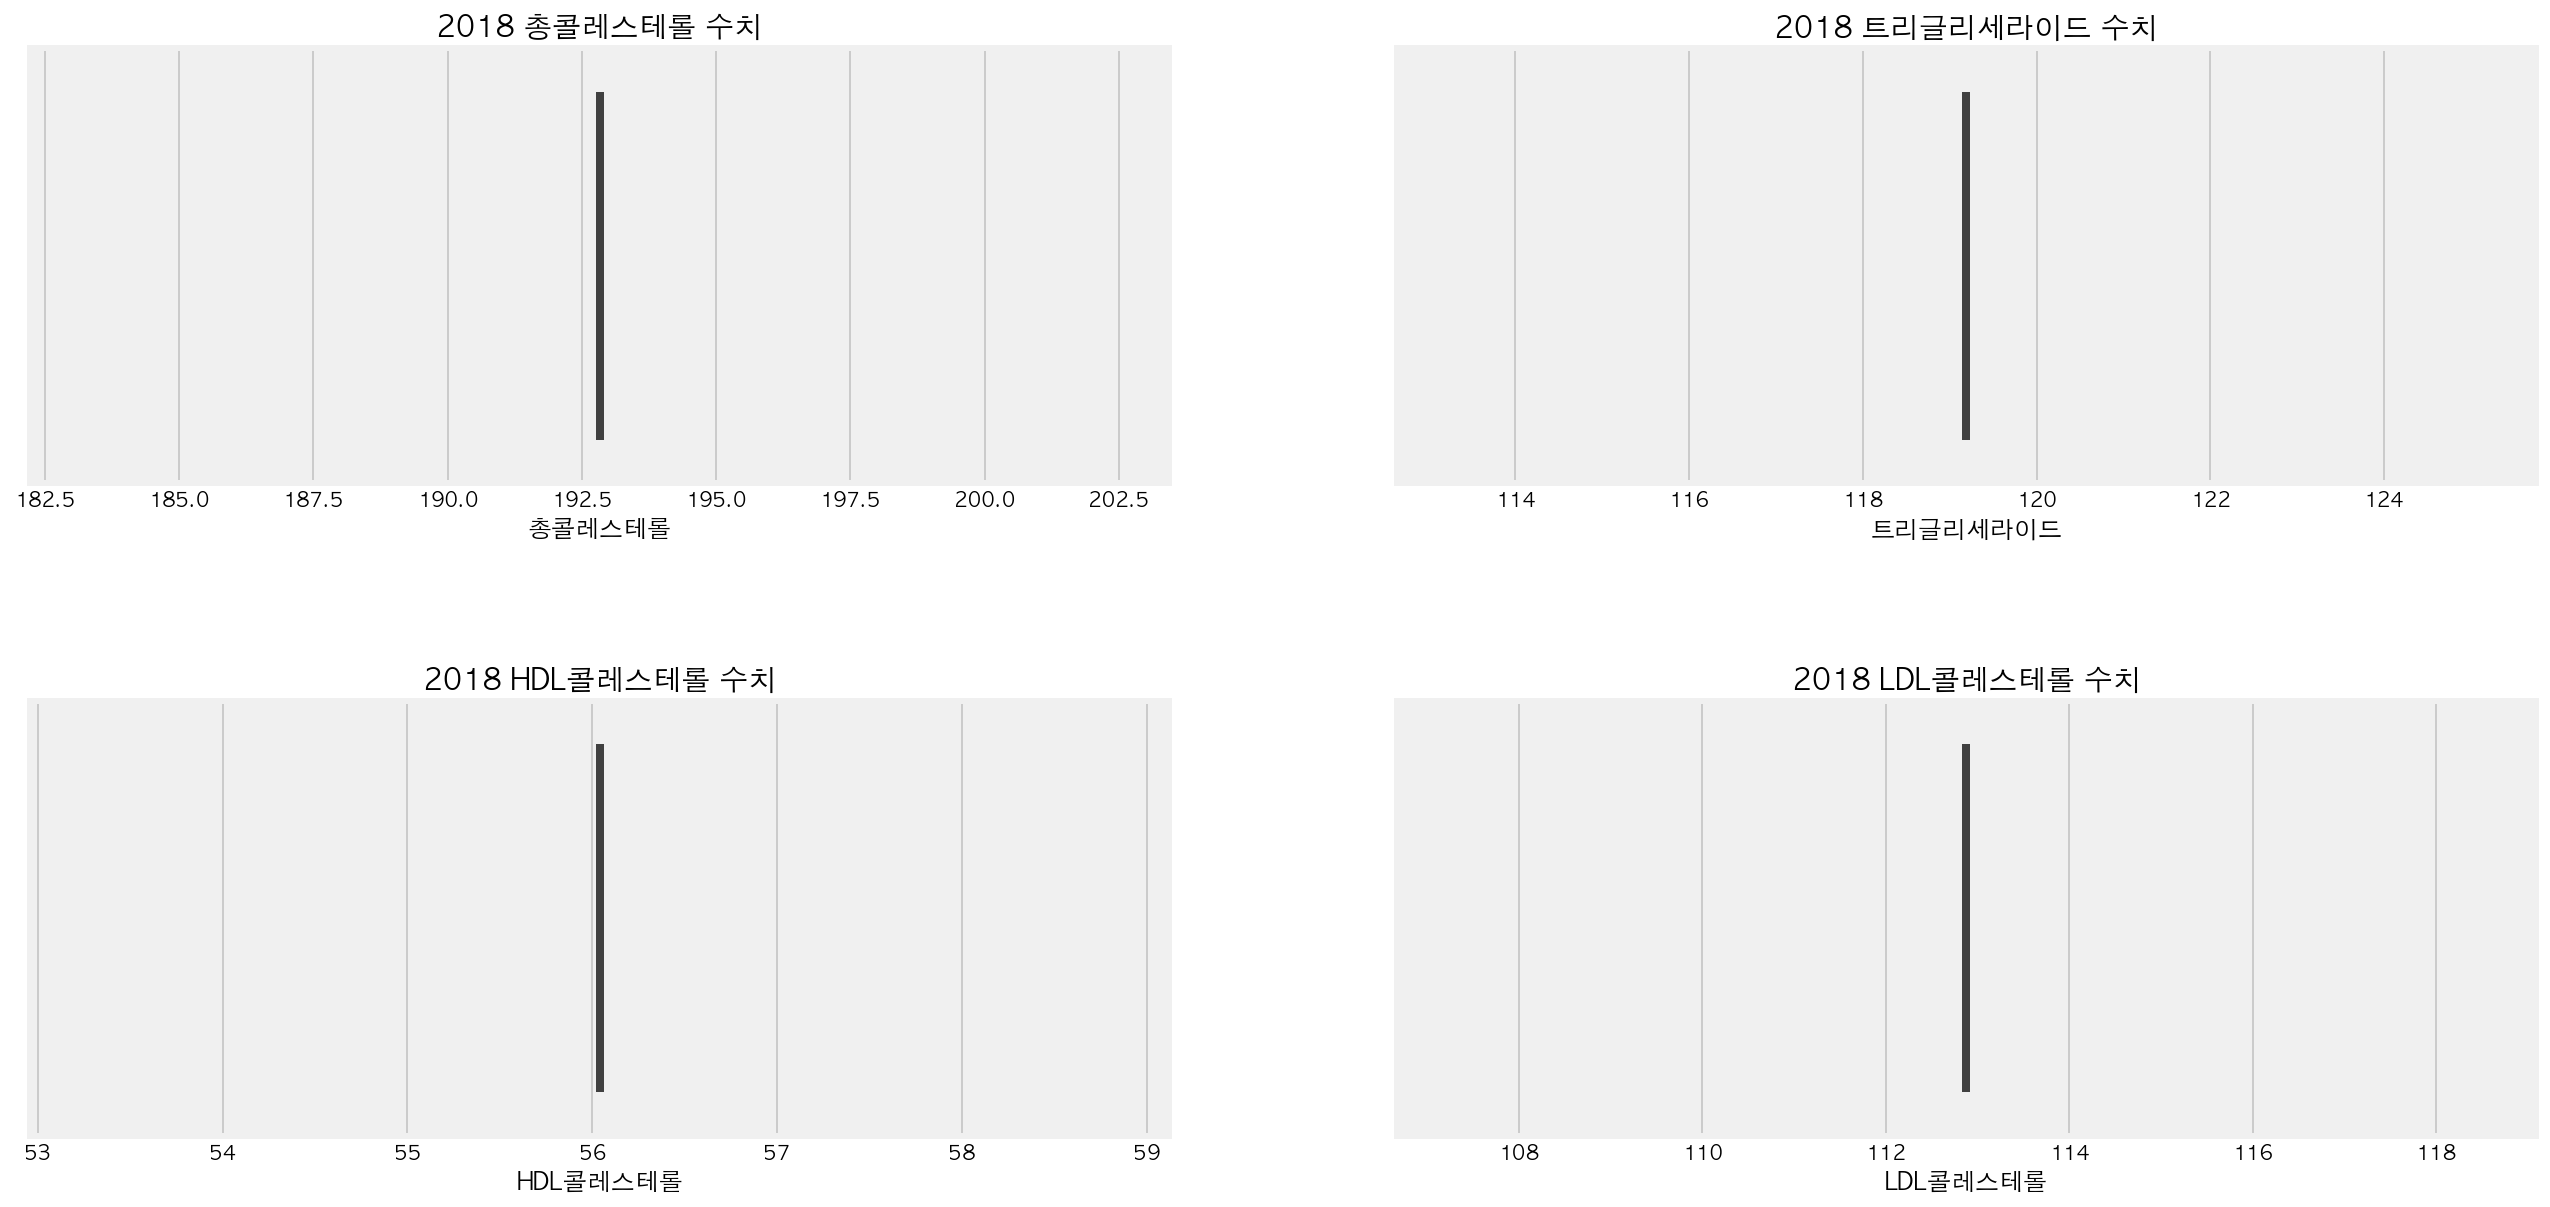

In [46]:
f, ax = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(x="총콜레스테롤", data=data2, ax=ax[0,0])
ax[0,0].set_title('2018 총콜레스테롤 수치')
sns.boxplot(x="트리글리세라이드", data=data2, ax=ax[0,1])
ax[0,1].set_title('2018 트리글리세라이드 수치')
sns.boxplot(x="HDL콜레스테롤", data=data2, ax=ax[1,0])
ax[1,0].set_title('2018 HDL콜레스테롤 수치')
sns.boxplot(x="LDL콜레스테롤", data=data2, ax=ax[1,1])
ax[1,1].set_title('2018 LDL콜레스테롤 수치')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [224]:
len(data2)

667233

2018년도가 이상하게 나온다...

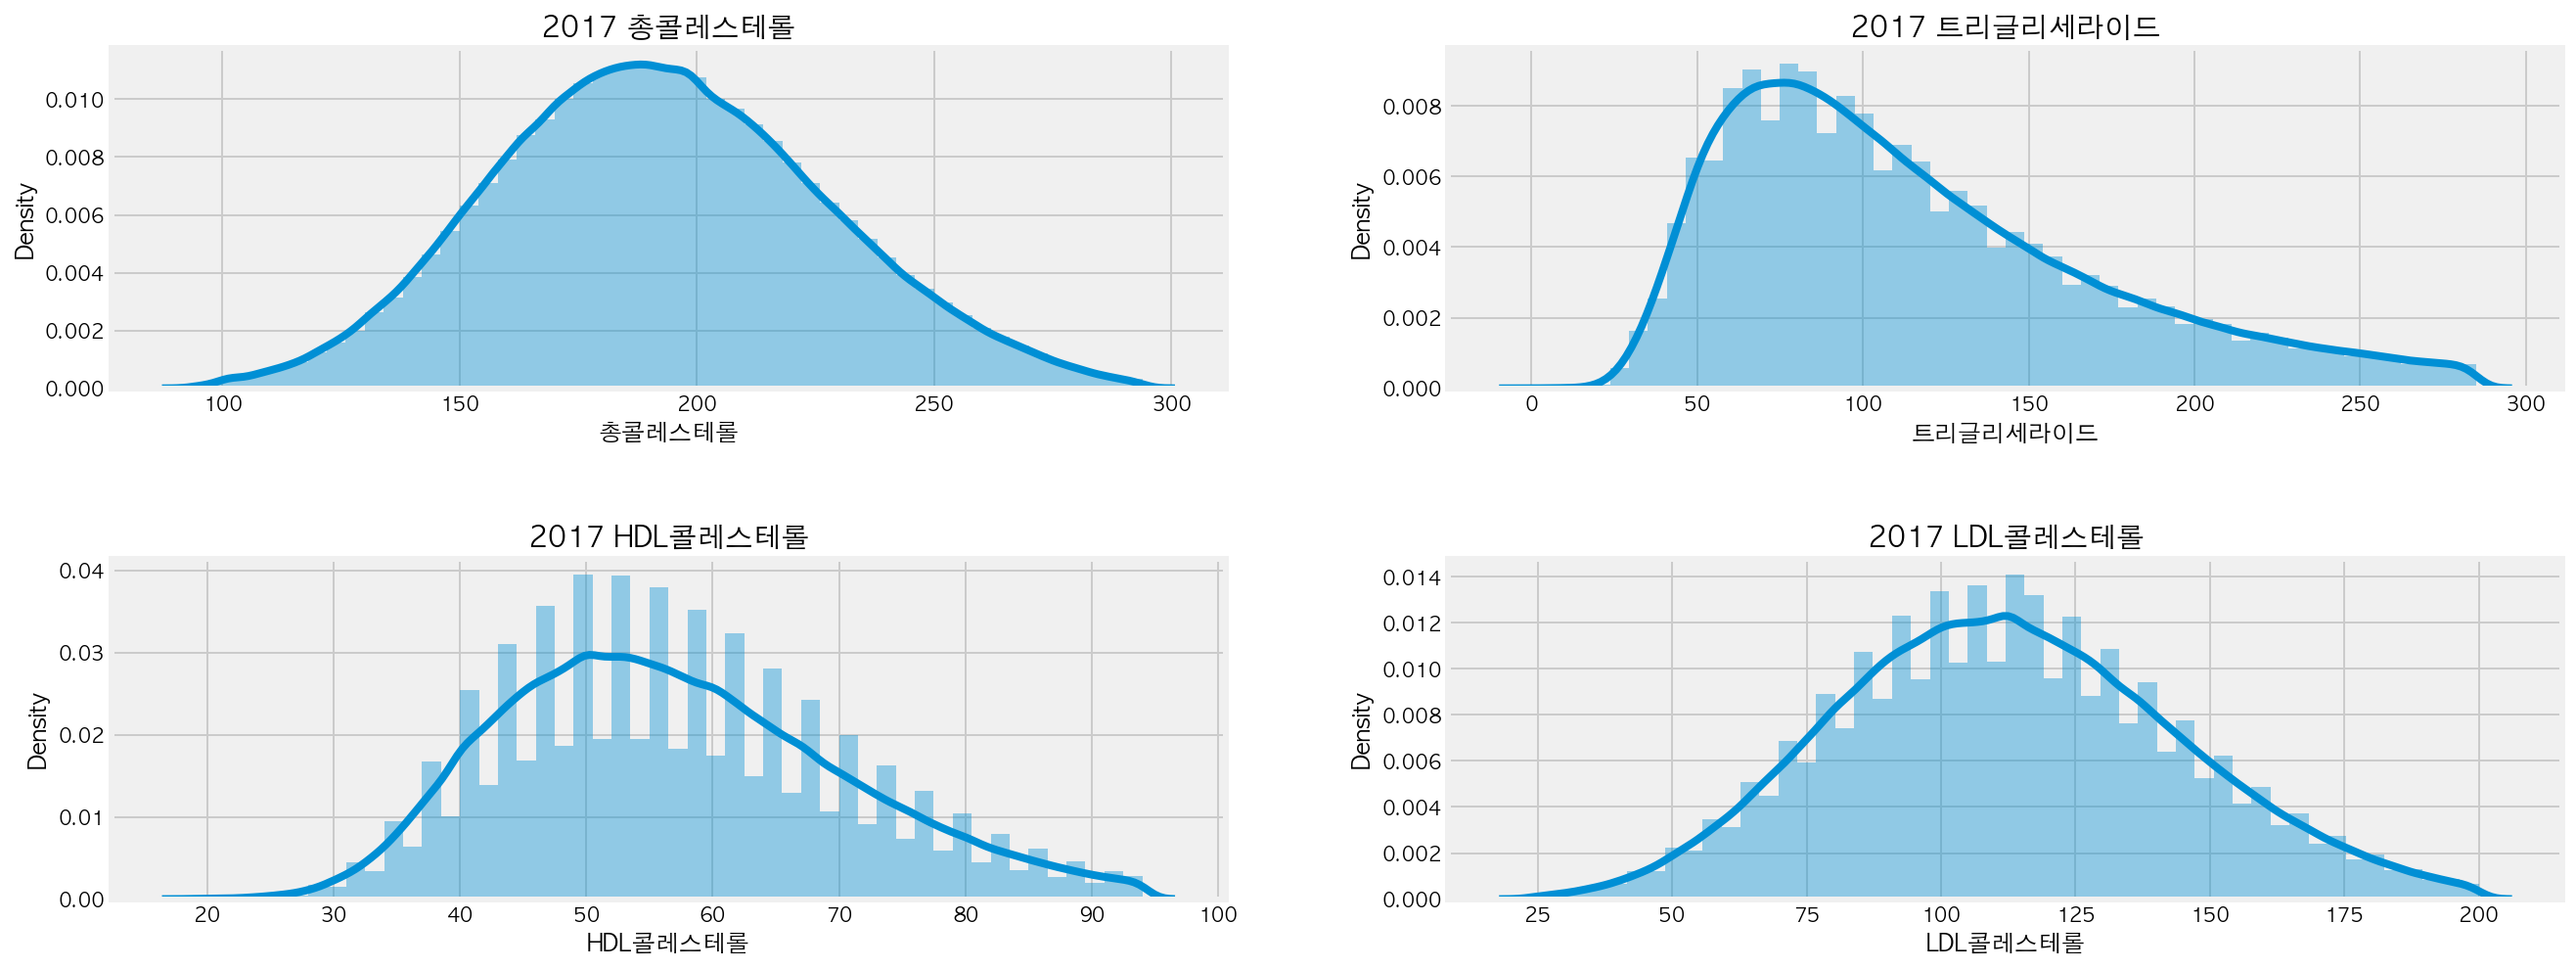

In [52]:
f, ax = plt.subplots(2,2, figsize=(20,8))
sns.distplot(data1['총콜레스테롤'],ax=ax[0,0])
ax[0,0].set_title('2017 총콜레스테롤')
sns.distplot(data1['트리글리세라이드'],ax=ax[0,1])
ax[0,1].set_title('2017 트리글리세라이드')
sns.distplot(data1['HDL콜레스테롤'],ax=ax[1,0])
ax[1,0].set_title('2017 HDL콜레스테롤')
sns.distplot(data1['LDL콜레스테롤'],ax=ax[1,1])
ax[1,1].set_title('2017 LDL콜레스테롤')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

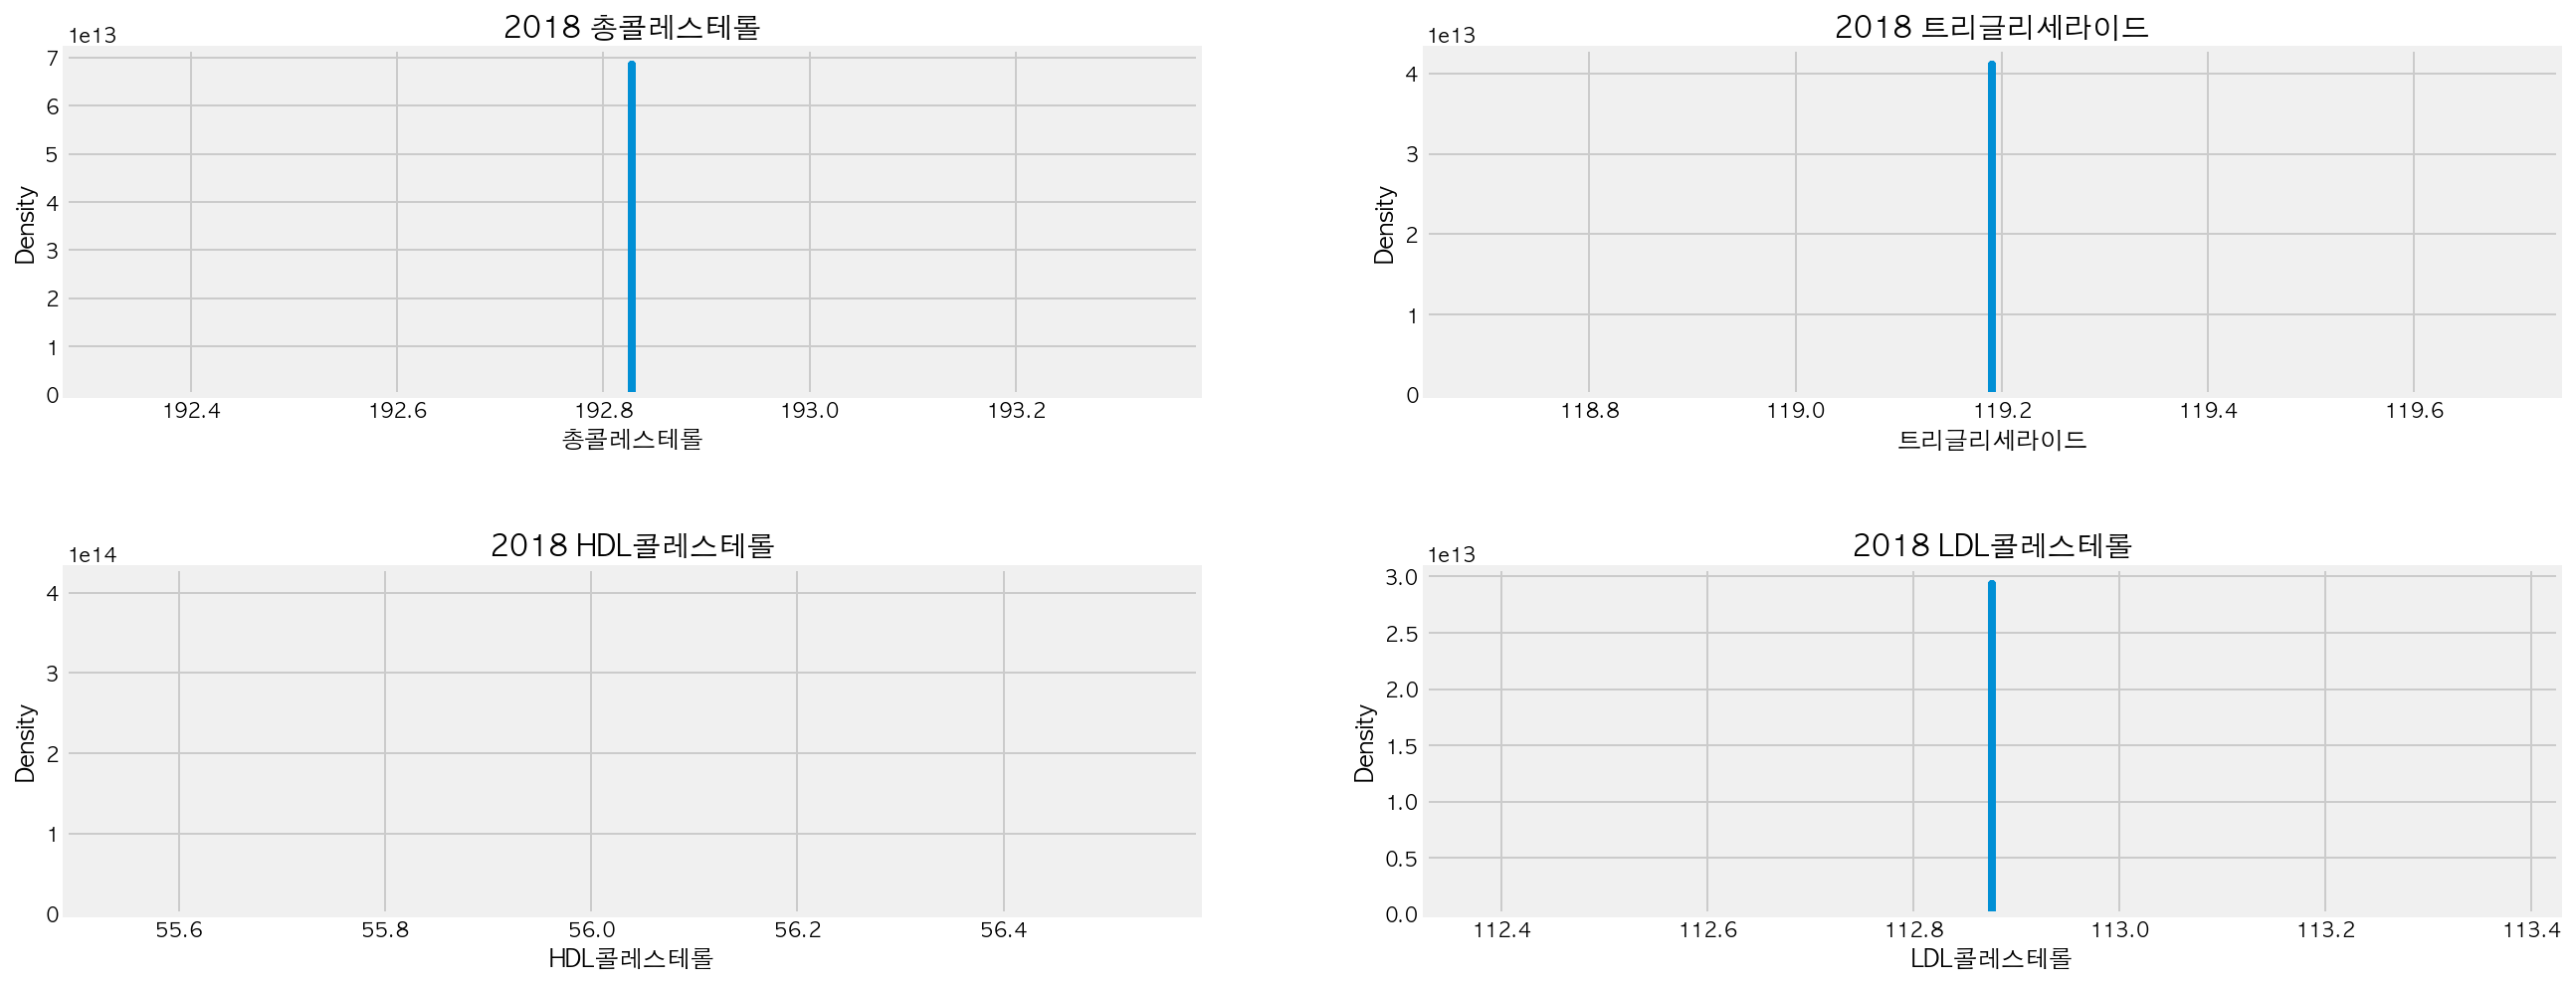

In [49]:
f, ax = plt.subplots(2,2, figsize=(20,8))
sns.distplot(data2['총콜레스테롤'],ax=ax[0,0])
ax[0,0].set_title('2018 총콜레스테롤')
sns.distplot(data2['트리글리세라이드'],ax=ax[0,1])
ax[0,1].set_title('2018 트리글리세라이드')
sns.distplot(data2['HDL콜레스테롤'],ax=ax[1,0])
ax[1,0].set_title('2018 HDL콜레스테롤')
sns.distplot(data2['LDL콜레스테롤'],ax=ax[1,1])
ax[1,1].set_title('2018 LDL콜레스테롤')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

2018년도의 데이터가 60퍼 이상이 비어있어서 여기에 평균값을 대입해도 정상적인 결과가 나오지 않는다..

### 2018년도의 null 데이터를 어떻게 처리할 지가 문제..